In [1]:
from collections import defaultdict
items = []
items.append("I am mighty #annoyed today #food")
items.append("I am #annoyed at this #software")
items.append("#software makes me #annoyed")
items.append("#food makes me #happy and #hungry")
items.append("#food again #happy")

from scipy.stats import pearsonr, spearmanr
import re
from itertools import combinations

def allequal(data):
    equality = data[0]
    for item in data:
        if item != equality:
            return False
    return True

def correlate_hashags(items):
    keys = set([])
    presences = []
    for item in items:
        match = re.findall("#([A-Za-z0-9]*)", item)
        this_presences = {}
        for matched_item in match:
            this_presences[matched_item] = True
            keys.add(matched_item)
        presences.append(this_presences)
    
    run_correlation = True
    for key, subkey in combinations(keys, 2):
            data1 = []
            data2 = []
            run_correlation = True
            for i, post in enumerate(items):
                data1.append(key in presences[i])
                data2.append(subkey in presences[i])
            if allequal(data1):
                print("Correlation is constant, {} appears everywhere".format(key))
                run_correlation = False
            if allequal(data2):
                print("Correlation is constant, {} appears everywhere".format(subkey))
                run_correlation = False
            if run_correlation:
                corr, _ = pearsonr(data1, data2)
                # print("Testing {} and {} {:03f}".format(key, subkey, corr))
                yield (key, subkey, corr)

corrs = correlate_hashags(items)
for key, subkey, corr in corrs:
    if corr > 0:
        print("{} has a positive correlation with {} @ {:.3f}".format(key, subkey, corr))
    else:
        # print("{} has a negative correlation with {} @ {:.3f}".format(key, subkey, corr))
        print("You don't get {} with {}".format(key, subkey, corr))


You don't get software with hungry
software has a positive correlation with annoyed @ 0.667
You don't get software with happy
You don't get software with food
You don't get hungry with annoyed
hungry has a positive correlation with happy @ 0.612
hungry has a positive correlation with food @ 0.408
You don't get annoyed with happy
You don't get annoyed with food
happy has a positive correlation with food @ 0.667


In [2]:
from collections import Counter
from scipy.stats import pearsonr

items = []
items.append("2020-08-16 20:17 Another Innocuous log line")
items.append("2020-08-16 20:17 Log line that causes the error")
items.append("2020-08-16 20:17 ERROR: error caused")
items.append("2020-08-16 20:17 Innocuous log line")
items.append("2020-08-16 20:17 Log line that causes the error")
items.append("2020-08-16 20:17 ERROR: error caused")
items.append("2020-08-16 20:17 Log line that causes the error")
items.append("2020-08-16 20:17 ERROR: error caused")
items.append("2020-08-16 20:17 A third innocuous log line")
items.append("2020-08-16 20:17 Log line that causes the error")
items.append("2020-08-16 20:17 ERROR: error caused")
items.append("2020-08-16 20:17 Log line that causes the error")
items.append("2020-08-16 20:17 Innocuous log line")
items.append("2020-08-16 20:17 ERROR: error caused")
items.append("2020-08-16 20:17 Another cause of error")
items.append("2020-08-16 20:17 Innocuous log line")
items.append("2020-08-16 20:17 ERROR: error caused")
items.append("2020-08-16 20:17 Another cause of error")
items.append("2020-08-16 20:17 Innocuous log line")
items.append("2020-08-16 20:17 ERROR: error caused")
items.append("2020-08-16 20:17 Another cause of error")
items.append("2020-08-16 20:17 ERROR: error caused")
items.append("2020-08-16 20:17 Another cause of error")
items.append("2020-08-16 20:17 ERROR: error caused")

def find_error_cause(items):
    chances = {}
    for scanback in range(0, 10):
        for line in items:
            if "ERROR" in line:
                continue
            errors = []
            logs = []
            log_line_identity = line.split(" ")[2:]
            log_line = " ".join(log_line_identity)
            for _ in range(0, scanback):
                errors.append(0)

            for line in items:
                if "ERROR" in line:
                    errors.append(100)
                else:
                    errors.append(0)

            for line in items:
                if log_line in line:
                    logs.append(100)
                else:
                    logs.append(0)

            for _ in range(0, scanback):
                logs.append(0)

            corr, _ = pearsonr(errors, logs)

            if corr > 0:
                chances[log_line] = chances.get(log_line, 0) + 1
    return Counter(chances).most_common()

            

chances = find_error_cause(items)
print(chances)

[('Another cause of error', 16), ('Log line that causes the error', 15), ('Innocuous log line', 12), ('A third innocuous log line', 3)]


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(["hello how are you", "i am fine"])
X = cv.transform(["hello how are you", "i am fine"])
X_test = cv.transform(["how are you"])
print(X)

  (0, 1)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1


In [4]:
feature_to_coef = {
    word: 0 for word in cv.get_feature_names()
}

In [5]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Comment out the following line if you are using Jupyter Notebook
# %matplotlib inline
# Use a predefined style set
plt.style.use('ggplot')

# Import Faker
from faker import Faker
fake = Faker()

# To ensure the results are reproducible
Faker.seed(4321)

names_list = []

fake = Faker()
for _ in range(100):
  names_list.append(fake.name())

# To ensure the results are reproducible
np.random.seed(7)

salaries = []
for _ in range(100):
    salary = np.random.randint(1000,2500)
    salaries.append(salary)

# Create pandas DataFrame
salary_df = pd.DataFrame(
    {'Person': names_list,
     'Salary (in USD)': salaries
    })

# Print a subsection of the DataFrame
print(salary_df.head())

              Person  Salary (in USD)
0        Jason Brown             1175
1        Jacob Stein             2220
2         Cody Brown             1537
3      Larry Morales             1502
4  Jessica Hendricks             1211


In [6]:
salary_df.at[16, 'Salary (in USD)'] = 23
salary_df.at[65, 'Salary (in USD)'] = 17

# Verify if the salaries were changed
print(salary_df.loc[16])
print(salary_df.loc[65])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
Name: 16, dtype: object
Person             Joyce Bishop
Salary (in USD)              17
Name: 65, dtype: object


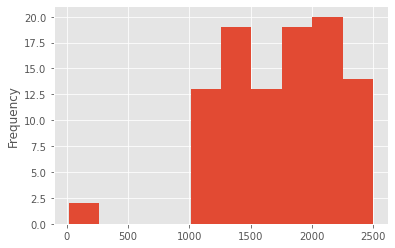

In [7]:
salary_df['Salary (in USD)'].plot(kind='hist')
plt.show()

In [8]:
salary_raw = salary_df['Salary (in USD)'].values

# For compatibility with the SciPy implementation
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')

In [9]:
from scipy.cluster.vq import kmeans
    
# Specify the data and the number of clusters to kmeans()
centroids, avg_distance = kmeans(salary_raw, 4)

In [10]:
from scipy.cluster.vq import vq
groups, cdist = vq(salary_raw, centroids)

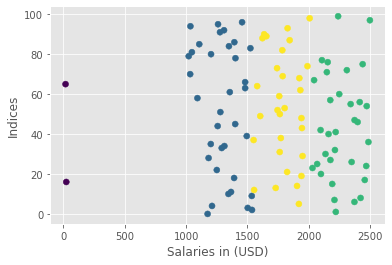

In [11]:
plt.scatter(salary_raw, np.arange(0,100), c=groups)
plt.xlabel('Salaries in (USD)')
plt.ylabel('Indices')
plt.show()

In [12]:
from pyod.models.knn import KNN

In [13]:
X = salary_df['Salary (in USD)'].values.reshape(-1,1)


# Train kNN detector
clf = KNN(contamination=0.02, n_neighbors=5)
clf.fit(X)

KNN(algorithm='auto', contamination=0.02, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [14]:
y_train_pred = clf.labels_ 
    
# Outlier scores
y_train_scores = clf.decision_scores_

In [15]:
salary_df['class'] = 0

# Manually edit the labels for the anomalies
salary_df.at[16, 'class'] = 1
salary_df.at[65, 'class'] = 1
y = salary_df['class'].values

# Veirfy 
print(salary_df.loc[16])

from pyod.utils import evaluate_print

# Evaluate on the training data
evaluate_print('KNN', y, y_train_scores)

Person             Miss Amanda Harris MD
Salary (in USD)                       23
class                                  1
Name: 16, dtype: object
KNN ROC:1.0, precision @ rank n:1.0


In [16]:
X_test = np.array([[1000]])

In [17]:
clf.predict(X_test)

array([0])

In [18]:
X

array([[1175],
       [2220],
       [1537],
       [1502],
       [1211],
       [1919],
       [2372],
       [2209],
       [2422],
       [1535],
       [1345],
       [1366],
       [1554],
       [1730],
       [1904],
       [2191],
       [  23],
       [2456],
       [1391],
       [1940],
       [2099],
       [1823],
       [1250],
       [2030],
       [2468],
       [2068],
       [2349],
       [2176],
       [1183],
       [1949],
       [2136],
       [1763],
       [2213],
       [1290],
       [1312],
       [1201],
       [2486],
       [1550],
       [1772],
       [1494],
       [2161],
       [2219],
       [2096],
       [1944],
       [1257],
       [1400],
       [2398],
       [2373],
       [1940],
       [1604],
       [1764],
       [1279],
       [1745],
       [1803],
       [2472],
       [2341],
       [2415],
       [2175],
       [1092],
       [1759],
       [2248],
       [1356],
       [1931],
       [1481],
       [1579],
       [  17],
       [14

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from numpy import array, pad, append
class WordIdentifier():
    def __init__(self):
        self.words = {}
    def fit(self, data):
        lines = []
        for line in data:
            words = line.split(" ")
            line_ids = []
            for word in words:
                if word in self.words:
                    word_id = self.words[word]
                else:
                    word_id = len(self.words.values())
                    self.words[word] = word_id
                
          
        
    def test(self, data):
        weirdness_score = 0
        for line in data:
            words = line.split(" ")
            for word in words:
                if word not in self.words:
                    weirdness_score = weirdness_score + 1
                    
        return weirdness_score

cv = WordIdentifier()

X = cv.fit(["hello how are you", "i am fine"])
X_test = cv.test(["this is a strange sentence", "another sentence here"])

print(X_test)

8


In [20]:
class Db():
    def __init__(self):
        self.partition_keys = []
        self.db = {}
        
    def add_access_pattern(self, data):
        from_table, operator, to_table = data.split(" ")
        if operator == "-*->":
            self.partition_keys.append({
                "partition_key": from_table,
                "sort_key": to_table
            })
       
        
    def insert(self, field, data):
        for partition_key in self.partition_keys:
            if partition_key["partition_key"].startswith(field):
                subcollection = data[partition_key["sort_key"]]
                del data[partition_key["sort_key"]]
                parent_key = "{}-{}".format(partition_key["partition_key"], data["id"])
                self.db[parent_key] = data
                
                for sub in subcollection:
                    self.db["{}:{}-{}".format(parent_key, partition_key["sort_key"], sub["id"])] = sub
                
db = Db()
db.add_access_pattern("strategies -*-> problems")
db.insert("strategies", {"strategy": "strategy name", "id": 1, "problems": [{"problem_name": "problem name", "id": 1}]})

print(db.db)

{'strategies-1': {'strategy': 'strategy name', 'id': 1}, 'strategies-1:problems-1': {'problem_name': 'problem name', 'id': 1}}


In [21]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)

	return 1/(1+np.exp(-x))

from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
    'This word has document too'
]
test = corpus + ["This is also first document", "This doesnt contain that word"]

size = len(test)

vectorizer = CountVectorizer()
test_vector = vectorizer.fit_transform(test).toarray()

X = vectorizer.fit_transform(corpus).toarray()

print(X.shape)
                
y = np.array([[1],
			[0],
			[0],
			[1],
            [0]])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((X.shape[1], X.shape[1])) - 1
syn1 = 2*np.random.random((X.shape[1], X.shape[1])) - 1
syn2 = 2*np.random.random((X.shape[1], X.shape[1])) - 1

for j in range(60000):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    l3 = nonlin(np.dot(l2,syn2))

    # how much did we miss the target value?
    l3_error = y - l3
    
    if (j% 10_000) == 0:
        # print("Error:".format() + str(np.mean(np.abs(l3_error))))
        pass # print(l3)
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l3_delta = l3_error * nonlin(l3,deriv=True)
    l2_error = l3_delta.dot(syn2.T)
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    

    syn2 += l2.T.dot(l3_delta)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

l0 = X
l1 = nonlin(np.dot(l0,syn0))
l2 = nonlin(np.dot(l1,syn1))
l3 = nonlin(np.dot(l2,syn2))
print("Learned result:")
print(l3.round())
    
# Test weights

X = test_vector


    

row = []
col = []
for _ in range(0, X.shape[1]):
    row.append(1)


for _ in range(X.shape[0], X.shape[1]):
    X =  np.vstack([X, np.array(row)])
print("X shape ", X.shape)
l0 = X
for _ in range(0, X.shape[1]):
    col.append([1])
row = []
for _ in range(0, syn0.shape[1]):
    row.append(1)

print(X.shape)



    
for _ in range(syn0.shape[0], X.shape[1]):
    syn0 =  np.vstack([syn0, np.array(row)])
for _ in range(syn1.shape[0], X.shape[1]):
    syn1 =  np.vstack([syn1, np.array(row)])
for _ in range(syn2.shape[0], X.shape[1]):
    syn2 =  np.vstack([syn2, np.array(row)])

for _ in range(syn0.shape[1], X.shape[1]):
    syn0 = np.hstack([syn0, np.array(col)])
    
for _ in range(syn1.shape[1], X.shape[1]):
    syn1 = np.hstack([syn1, np.array(col)])

for _ in range(syn2.shape[1], X.shape[1]):
    syn2 = np.hstack([syn2, np.array(col)])

print(syn0.shape)

l1 = nonlin(np.dot(l0,syn0))
#l2 = nonlin(np.dot(l1,syn1))
#l3 = nonlin(np.dot(l2,syn2))
print("Learned result:")
print(l1.round())




(5, 12)
Learned result:
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
X shape  (16, 16)
(16, 16)
(16, 16)
Learned result:
[[0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 

In [22]:
2*np.random.random((4,4)) - 1

array([[-0.04385499, -0.05199215,  0.60632668, -0.19521496],
       [ 0.80937232, -0.9258779 ,  0.54774869, -0.74871724],
       [ 0.23702713, -0.97927148,  0.07725457, -0.99396409],
       [ 0.90238757,  0.81080407,  0.59193388,  0.83054864]])

In [23]:
import numpy as np

def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)

	return 1/(1+np.exp(-x))
    
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()
                
y = np.array([[1],
			[0],
			[0],
			[1]])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((9,9)) - 1
syn1 = 2*np.random.random((9,9)) - 1

for j in range(60000):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2
    
    if (j% 10000) == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

l0 = X
l1 = nonlin(np.dot(l0,syn0))
l2 = nonlin(np.dot(l1,syn1))
print(l2)

Error:0.4987786212309463
Error:0.0028477988723313225
Error:0.001991695812585195
Error:0.0016176523279724103
Error:0.0013962890489379722
Error:0.0012459405705630552
[[0.99896362 0.99900523 0.99894223 0.99893227 0.99895094 0.99897246
  0.99896165 0.99891373 0.99892823]
 [0.00130704 0.00128725 0.00134514 0.00130788 0.00132711 0.00133305
  0.00134061 0.00132101 0.00132304]
 [0.00113832 0.00110745 0.00109778 0.00117921 0.00111497 0.00106272
  0.00107355 0.00118817 0.00115877]
 [0.99896362 0.99900523 0.99894223 0.99893227 0.99895094 0.99897246
  0.99896165 0.99891373 0.99892823]]


In [24]:
class Tree():
    def __init__(self, value):
        self.left = None
        self.right = None
        self.value = value
        
    def insert(self, value):
        if self.left == None \
            and value < self.value:
                self.left = Tree(value)
        elif self.right == None \
        and value > self.value:
                self.right = Tree(value)
                
        elif value > self.value:
            self.right.insert(value)
        elif value < self.value:
            self.left.insert(value)
            
    def walk(self):
        if self.left:
            self.left.walk()
        print(self.value)
        if self.right:
            self.right.walk()
            

root = Tree(6)
root.insert(4)
root.insert(7)
root.walk()
            

4
6
7


In [25]:
class Tree():
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        
    def insert(self, value):
        if self.left == None and value <= self.value:
            self.left = Tree(value)
        elif self.right == None and value > self.value:
            self.right = Tree(value)
        elif value > self.value:
            self.right.insert(value)
        elif value < self.value:
            self.left.insert(value)
        elif self.value == "":
            self.value = value
        return self

    def walk(self, less_than, stop):
       
        if self.left:
            yield from self.left.walk(less_than, stop)
        if less_than <= self.value and self.value <= stop:
            yield self.value
        if self.right:
            yield from self.right.walk(less_than, stop)
        

root = Tree("") \
.insert("2020-10-01") \
.insert("2020-07-01") \
.insert("2020-05-01") \
.insert("2020-06-01") \
.insert("2020-07-01") \
.insert("2020-08-01") \
.insert("2020-09-01")

list(root.walk("2020-07-01", "2020-09-01"))

['2020-07-01', '2020-08-01', '2020-09-01']

In [267]:
import bisect
import random

class BTree():
    def __init__(self, leaf, M, key, value, parent=None):
        self.leaf = leaf
        self.children = []
        self.M = M
        self.key = key
        self.value = value
        self.parent = parent
    
   
    def walk(self):
        for child in self.children:
            
            if child.leaf:
                yield child
            yield from child.walk()
        
    def __repr__(self):
        return "{}:{}".format(self.key, self.value)

    def __str__(self):
        return "{}:{}".format(self.key, self.value)
        
    def insert(self, key, value, height=1, parent=None):
        next_children = self.children
        leaf = self
        found = False
        parents = [self]
        child = None
        last_child = self
        while found == False:
            next_children_changed = False
            for child in reversed(next_children):
                if key >= child.key:
                    print("Inspecting {} <= {} ".format(child.key, key))
                    next_children = child.children
                    
                    last_child = leaf
                    parents.append(child)
                    leaf = child
                    next_children_changed = True
                    break
                    
                    
                        
                        
            if not next_children_changed:
                found = True
                
        
        leaf = last_child
        
        print("Trying to insert {} at Found insertion leaf {}".format(key, leaf))
        # walk(leaf)
        
        
        if len(leaf.children) < leaf.M:

            leaf.insert_non_full(key, value, parents[-1])
            
        else:
            # we need to split
            current = leaf
            

            inserted = False
            new_root = None
            
            
            while current != None:
                
                
                original_parent = current.parent
                if len(current.children) >= current.M:
                    


                    
                    new_left, new_right, separation_value = current.split()
                                      

                    if original_parent == None:
                        
                        new_root = BTree(False, self.M, 0, None)
                        
                        parent = new_root
                        

                        new_root.children.append(new_left)
                        
                        new_root.children.append(new_right)
                        
                        new_root.key = new_left.key
                        new_root.value = new_left.value
                        

                    else:
                        
                        parent = original_parent
                      
                        original_parent.children.remove(current)
                        original_parent.children.append(new_left)
                        
                        original_parent.children.append(new_right)
                        original_parent.sort()
                   
                        
                

                    new_left.parent = parent
                    new_right.parent = parent
                    
                    assert new_right.key > new_left.key
                        
                    

                



                
                current = original_parent

                
                
            
            if new_root != None:
                # split went to root
                print("Split went to root")
                
                # walk(new_root)
                return new_root.insert(key, value)
            else:
                
                return self.insert(key, value)
            return self
            
            
        
        return self
            
        
            

    def split(self):

        
        new_self = BTree(True, self.M, 0, None)
        new_self.key = self.key
        new_self.value = self.value
        new_left = BTree(False, self.M, 0, None)
        new_sibling = BTree(False, self.M, 0, None)
        midpoint = int((len(self.children)+1)/2)

                
        left_children = []
        if self.leaf:
            left_children = [new_self]

        left_children = left_children + self.children[0:midpoint]
        right_children = self.children[midpoint:]
        for child in left_children:
            child.parent = new_left
        for child in right_children:
            child.parent = new_sibling

        new_sibling.key = right_children[0].key
        new_sibling.value = right_children[0].value

        new_left.children = left_children
        new_sibling.children = right_children

        new_left.leaf = False

        new_left.key = left_children[0].key
        new_left.value = left_children[0].value

        return new_left, new_sibling, self.children[midpoint].key


                
        
    def insert_after_split(self, key, value, parent):
        height = height + 1
        
        
        insertion_point, index = self.find_location_for_key(key)

        if insertion_point == None:
            self.insert_non_full(key, value, parent)
        else:
            split = insertion_point.insert(key, value, parent=self)

            return split
        
        return self
    
    def insert_non_full(self, key, value, parent):
        values = [child.key for child in self.children]
        new_pos = bisect.bisect(values, key)
        self.children.insert(new_pos, BTree(True, self.M, key, value, parent))
        return self

    def sort(self):
        self.children.sort(key=lambda x: x.key)
    
    def find_location_for_key(self, key):
        index = None
        for child in self.children:
            if cmp(key, child.key) >= 0:
                  index = child, self.children.index(child)
        if index:
            return index
        else:
            return None, -1
    
    def search(self, greater_than_equal, less_than):
        
            
        for child in self.children:
            if child.key >= greater_than_equal and child.key < less_than:
                if child.leaf:
                    yield child
                    yield from child.search(greater_than_equal, less_than)
                else:
                    yield from child.search(greater_than_equal, less_than)
    
    def delete(self, key):
        deletion_point, index = self.find_location_for_key(key)
        if deletion_point:
            if deletion_point.key == key:
                self.children.remove(deletion_point)
                return True
            else:
                return deletion_point.delete(key)
        else:
            return False
        

    

def walk(item, spaces=0):
    
    print("{}{}={} {} {}".format(" " * spaces, item.key, item.value, "leaf" if item.leaf else "", item.parent))
    
    for child in item.children:
        walk(child, spaces + 1)

root = BTree(False, 3, 0, None)\
.insert(1, "1")\
.insert(2, "2")\
.insert(3, "3")\
.insert(4, "4")

for i in range(5, 100):
    root = root.insert(i, str(i))


walk(root)

print(root.children)

def keysonly(items):
    for item in items:
        yield item.key

assert sorted(list(keysonly(root.walk()))) == list(keysonly(root.walk()))

root = BTree(False, 3, 0, None)


seen = {}

for i in range(1, 100):
    num1 = random.randint(0, 100)
    if num1 not in seen:
        seen[num1] = True
    
        root = root.insert(num1, str(num1))



walk(root)

for item in root.walk():
    print(item.key, item.value)

assert sorted(list(keysonly(root.walk()))) == list(keysonly(root.walk()))

Trying to insert 1 at Found insertion leaf 0:None
Inspecting 1 <= 2 
Trying to insert 2 at Found insertion leaf 0:None
Inspecting 2 <= 3 
Trying to insert 3 at Found insertion leaf 0:None
Inspecting 3 <= 4 
Trying to insert 4 at Found insertion leaf 0:None
Split went to root
Inspecting 3 <= 4 
Inspecting 3 <= 4 
Trying to insert 4 at Found insertion leaf 3:3
Inspecting 3 <= 5 
Inspecting 4 <= 5 
Trying to insert 5 at Found insertion leaf 3:3
Inspecting 3 <= 6 
Inspecting 5 <= 6 
Trying to insert 6 at Found insertion leaf 3:3
Split went to root
Inspecting 5 <= 6 
Inspecting 5 <= 6 
Inspecting 5 <= 6 
Trying to insert 6 at Found insertion leaf 5:5
Inspecting 5 <= 7 
Inspecting 5 <= 7 
Inspecting 6 <= 7 
Trying to insert 7 at Found insertion leaf 5:5
Inspecting 5 <= 8 
Inspecting 5 <= 8 
Inspecting 7 <= 8 
Trying to insert 8 at Found insertion leaf 5:5
Inspecting 5 <= 8 
Inspecting 7 <= 8 
Inspecting 7 <= 8 
Trying to insert 8 at Found insertion leaf 7:7
Inspecting 5 <= 9 
Inspecting 7 <=

In [119]:
root = BTree(False, 4, 0, None)\
.insert(8, "big")\
.insert(2, "hello")\
.insert(3, "world")\
.insert(6, "cabbage")\
.insert(1, "cool")\
.insert(7, "broken")\
.insert(4, "stillbroken")\
.insert(5, "borked")\
.insert(9, "doesitwork")

print(root.delete(7))

for item in root.walk():
    print(item.key, item.value)

Trying to insert 8 at Found insertion leaf 0:None
0=None  1 None
Trying to insert 2 at Found insertion leaf 0:None
0=None  1 None
 8=big leaf 1 0:None
Inspecting 2 <= 3 
Trying to insert 3 at Found insertion leaf 0:None
0=None  1 None
 2=hello leaf 1 0:None
 8=big leaf 1 0:None
Inspecting 2 <= 6 
Inspecting 3 <= 6 
Trying to insert 6 at Found insertion leaf 0:None
0=None  1 None
 2=hello leaf 1 0:None
 3=world leaf 1 0:None
 8=big leaf 1 0:None
Trying to insert 1 at Found insertion leaf 0:None
0=None  1 None
 2=hello leaf 1 0:None
 3=world leaf 1 0:None
 6=cabbage leaf 1 0:None
 8=big leaf 1 0:None
But it is full
Split went to root
Trying to insert 1 at Found insertion leaf 2:hello
2=hello  1 None
 2=hello  1 2:hello
  2=hello leaf 1 2:hello
  3=world leaf 1 2:hello
 6=cabbage  1 2:hello
  6=cabbage leaf 1 6:cabbage
  8=big leaf 1 6:cabbage
Inspecting 1 <= 7 
Inspecting 2 <= 7 
Inspecting 6 <= 7 
Trying to insert 7 at Found insertion leaf 6:cabbage
6=cabbage  1 2:hello
 6=cabbage leaf 

In [2]:
from pprint import pprint
from operator import itemgetter
import re
from collections import defaultdict
from functools import reduce
items = [
    {"key": "C.keyword.0", "value": "databases"},
    {"key": "C.keyword.1", "value": "cat"},
    {"key": "C.keyword.2", "value": "car"},
    {"key": "C.keyword.3", "value": "cat"},
    {"key": "C.searchterm.0", "value": "search"},
    {"key": "R.people.0.id", "value": 0},
    {"key": "R.people.1.id", "value": 1},
    {"key": "R.people.1.people_name", "value": "Paul"},
    {"key": "R.people.1.age", "value": 26},
    {"key": "R.people.0.people_name", "value": "Samuel"},
    {"key": "R.people.0.age", "value": 30},
    {"key": "R.items.0.search", "value": "Things"},
    {"key": "R.items.0.id", "value": 0},
    {"key": "R.items.1.search", "value": "Others"},
    {"key": "R.items.1.id", "value": 1},
    {"key": "R.items.0.people", "value": 0},
    {"key": "R.items.1.people", "value": 1},
    {"key": "R.products.0.id", "value": 0},
    {"key": "R.products.0.name", "value": "Things"},
    {"key": "R.products.1.id", "value": 1},
    {"key": "R.products.1.name", "value": "Others"},
    {"key": "R.products.1.price", "value": 20},
    {"key": "R.products.0.price", "value": 30},
]
items = sorted(items, key=itemgetter("key"))
pprint(items)


class Parser():
    def __init__(self):
        self.last_char = " "
        self.pos = 0
        self.select_clause = []
        self.join_clause = []
        self.end = False
        self.group_by = None
        self.insert_fields = []
        self.insert_values = []
        self.where_clause = []
        self.fts_clause = []
        

    def getchar(self):
        
        char = self.statement[self.pos]
        if self.pos + 1 == len(self.statement):
            self.end = True
            return char
        self.pos = self.pos + 1
        
        return char
        
    def gettok(self):
        while (self.end == False and (self.last_char == " " or self.last_char == "\n")):
            self.last_char = self.getchar()
        
        
              
        if self.last_char == "(":
            self.last_char = self.getchar()
            return "openbracket"
        
        if self.last_char == ")":
            self.last_char = self.getchar()
            return "closebracket"
        
        if self.last_char == "*":
            self.last_char = self.getchar()
            return "wildcard"
        
        if self.last_char == "'":
            self.last_char = self.getchar()
            identifier = ""
            while self.end == False and self.last_char != "'":
                if self.last_char == "\\":
                    self.last_char = self.getchar()
                identifier = identifier + self.last_char
                self.last_char = self.getchar()
            if self.end and self.last_char != ")" and self.last_char != "'":
                identifier += self.last_char
            
            self.last_char = self.getchar()
            
            return identifier
        
        if re.match("[a-zA-Z0-9\.\_]+", self.last_char):
            identifier = ""
            while self.end == False and re.match("[a-zA-Z0-9\.\_]+", self.last_char):
                
                identifier = identifier + self.last_char
                self.last_char = self.getchar()
            
            if self.end and self.last_char != ")":
                identifier += self.last_char
            
            return identifier
    
        if self.last_char == "=":
            self.last_char = self.getchar()
            return "eq"
        
        if self.last_char == "~":
            self.last_char = self.getchar()
            return "tilde"
        
        if self.last_char == ",":
            self.last_char = self.getchar()
            return "comma"
        
        if self.end:
            return None
        
    
    def parse_select(self, token=None):
        if token == None:
            token = self.gettok()
        if token == "comma":
            self.parse_select()
        elif token == "from":
            self.table_name = self.gettok()
            self.parse_rest()
        elif token != None:
            identifier = token
            
            token = self.gettok()
            if token == "openbracket": # we're in a function
                function_parameters = self.gettok()
                if function_parameters == "wildcard":
                    function_parameters = "*"
            else:
                if identifier == "wildcard":
                    identifier = "*"
                self.select_clause.append(identifier)
                self.parse_select(token)
                return
            closebracket = self.gettok()
            
            self.select_clause.append(identifier + "(" + function_parameters + ")")
            self.parse_select()
    
    def parse_rest(self):
        operation = self.gettok()
        print(operation)
        if operation == None:
            return
        if operation == "group":
            by = self.gettok()
            group_by = self.gettok()
            self.group_by = group_by
            
        if operation == "inner":
            join = self.gettok()
            self.join_table = self.gettok()
            on = self.gettok()
            join_target_1 = self.gettok()
            
            self.gettok()
            join_target_2 = self.gettok()
            self.join_clause.append([join_target_1, join_target_2])
            self.parse_rest()
            
        if operation == "where":
            self.parse_where()
            
    def parse_where(self):
        field = self.gettok()
        equals = self.gettok()
        value = self.gettok()
        print(equals)
        print(value)
        if re.match("[0-9\.]+", value):
            value = int(value)
        print("Equals operator:" + equals)
        if equals == "eq":
            self.where_clause.append((field, value))
        if equals == "tilde":
            self.fts_clause.append((field, value))
        another = self.gettok()
        if another == "and":
            self.parse_where()
        
    
    def parse_insert_fields(self):
        field_name = self.gettok()
        self.insert_fields.append(field_name)
    
        token = self.gettok()
        if token == "closebracket":
            self.parse_rest_insert()
        if token == "comma":
            self.parse_insert_fields()
    
    def parse_values(self):
        value = self.gettok()
        if re.match("[0-9\.]+", value):
            value = int(value)
        self.insert_values.append(value)
       
        token = self.gettok()
        
        if token == "comma":
            self.parse_values()
        if token == "closebracket":
            print("We have finished parsing insert into")
            
        
    def parse_rest_insert(self):
        values = self.gettok()
        if values == "values":
            openbracket = self.gettok()
            self.parse_values()
    
    def parse_insert(self):
        self.insert_table = self.gettok()
        openbracket = self.gettok()
        
        if openbracket == "openbracket":
            self.parse_insert_fields()
    
    def parse(self, statement):
        self.statement = statement
        token = self.gettok()
        if token == "select":
            self.parse_select()
        if token == "insert":
            into = self.gettok()
            self.parse_insert()
       


class SQLExecutor:
    def __init__(self, parser):
        self.parser = parser
    
    def get_tables(self, table_def):
        table_datas = []
        for pair in table_def:
            pair_data = []
            for selector in pair:
                table, field = selector.split(".")
                row_filter = "R.{}".format(table)
                table_data = list(filter(lambda x: x["key"].startswith(row_filter), items))
                pair_data.append((table_data, field))
            table_datas.append(pair_data)


        def table_reductions(table, metadata):
            for record in table:
                yield from reduce_table(metadata, record)
            yield metadata["current_record"]

        def reduce_table(table_metadata, record):
            components = record["key"].split(".")
            identifier = components[2]
            field_name = components[3]
            last_id = table_metadata["current_record"].get("internal_id")
            if last_id == None:
                table_metadata["current_record"] = {}
                table_metadata["current_record"]["internal_id"] = identifier
                table_metadata["current_record"][field_name] = record["value"]
            elif last_id != identifier:
                yield table_metadata["current_record"]
                # reset
                table_metadata["current_record"] = {}
                table_metadata["current_record"]["internal_id"] = identifier
                table_metadata["current_record"][field_name] = record["value"]
            elif last_id == identifier:
                table_metadata["current_record"][field_name] = record["value"]


        field_reductions = []
        for pair in table_datas:
            pair_items = []
            for item in pair:
                table, join_field = item
                field_reduction = table_reductions(table, defaultdict(dict))
                pair_items.append(field_reduction)
            field_reductions.append(pair_items)
        return table_datas, field_reductions
    
    def hash_join(self, records, index, pair, table_datas, process_records=True):
        ids_for_key = defaultdict(list)
        if process_records and len(records) > 0:
            scan = records
        else:
            scan = pair[0]
        
        for item in scan:
            field = table_datas[index][0][1]
            
            left_field = item[field]
            ids_for_key[left_field] = item
        
        for item in pair[1]:
            
            if table_datas[index][1][1] in item and item[table_datas[index][1][1]] in ids_for_key:
                item_value = item[table_datas[index][1][1]]
                print("Found match: {} in ids_for_key".format(item_value))
                yield {**ids_for_key[item[table_datas[index][1][1]]], **item}
    
    def execute(self):
        if self.parser.fts_clause:
            # full text search
            table_datas, field_reductions = self.get_tables([["{}.".format(self.parser.table_name)]])
            have_printed_header = False
            header = []
            output_lines = []
            outputs = []
            for result in self.process_wheres(field_reductions[0][0]):
                print("item: " + str(result))
                output_lines = []
                for field in self.parser.select_clause:

                    if field == "*":
                        for key, value in result.items():
                            if not have_printed_header:
                                header.append(key)
                            output_lines.append(value)
                    else:
                        output_lines.append(result[field])
                have_printed_header = True
                outputs.append(output_lines)
            print(header)
            print(outputs)
             
            
        elif self.parser.insert_values:
            insert_table = self.parser.insert_table
            print("Insert statement")
            created = False
            new_insert_count = 1
            for field, value in zip(self.parser.insert_fields, self.parser.insert_values):
                table_datas, field_reductions = self.get_tables([["{}.".format(insert_table)]])
                if not created:
                    new_insert_count = len(list(field_reductions[0][0])) + 1
                
                # create full text search index
                if isinstance(value, str): 
                    tokens = value.replace(",", "").split(" ")
                    for token in tokens:
                        new_key = "FTS.{}.{}.{}.{}".format(insert_table, field, token, new_insert_count)
                        items.append({
                            "key": new_key,
                            "value": new_insert_count
                        })
                
                
                new_key = "R.{}.{}.{}".format(insert_table, new_insert_count, field)
                items.append({
                    "key": new_key,
                    "value": value
                })
                new_key = "S.{}.{}.{}.{}".format(insert_table, field, value, new_insert_count)
                items.append({
                    "key": new_key,
                    "value": new_insert_count
                })
                new_key = "C.{}.{}.{}".format(insert_table, field, new_insert_count)
                items.append({
                    "key": new_key,
                    "value": value
                })
                if not created:
                    new_key = "R.{}.{}.id".format(insert_table, new_insert_count, field)
                    items.append({
                        "key": new_key,
                        "value": new_insert_count
                    })
                    created = True
                items.sort(key=itemgetter('key'))
            
        elif self.parser.group_by:
            print("Group by statement")
            group_by_components = parser.group_by.split(".")
            aggregator = defaultdict(list)
            row_specifier = "C.{}.{}".format(group_by_components[0], group_by_components[1])
            for item in filter(lambda x: x["key"].startswith(row_specifier), items):
                k = item["key"]
                v = item["value"]
      
                key_components = k.split(".")
                
                print(key_components[2])
                if (key_components[1] == group_by_components[0]) and (key_components[2] == group_by_components[1]):
                    aggregator[v].append(v)

            print(statement)
            for k, v in aggregator.items():
                output_line = ""
                for item in parser.select_clause:
                    if "count" in item:
                        output_line += str(len(aggregator[k]))
                    else:
                        output_line += str(k) + " "
                print(output_line)
                
        elif self.parser.join_clause:
            table_datas, field_reductions = self.get_tables(self.parser.join_clause)

            records = []
            for index, pair in enumerate(field_reductions):
                records = list(self.hash_join(records, index, pair, table_datas))
            
            records = self.process_wheres(records)
            print("records from join" + str(records))
            
            for record in records:
                output_line = []
                for clause in parser.select_clause:
                    table, field = clause.split(".")
                    output_line.append(record[field])
                print(output_line)
                
        elif self.parser.select_clause:
            table_datas, field_reductions = self.get_tables([["{}.".format(self.parser.table_name)]])
            have_printed_header = False
            header = []
            output_lines = []
            for result in self.process_wheres(field_reductions[0][0]):
                print("item: " + str(result))
                for field in self.parser.select_clause:

                    if field == "*":
                        for key, value in result.items():
                            if not have_printed_header:
                                header.append(key)
                            output_lines.append(value)
                    else:
                        output_lines.append(result[field])
                have_printed_header = True
            print(header)
            print(output_lines)
    
    def process_wheres(self, field_reductions):
        where_clause = self.parser.where_clause
        fts_clause = self.parser.fts_clause
        data = list(field_reductions)
        records = []
        if not where_clause and not fts_clause:
            return field_reductions
        reductions = []
        table_datas = []
        and_or = []        
        
        for restriction, value in fts_clause:
            print("Running FTS search for where clause value " + str(value))
            table, field = restriction.split(".")
            tokens = value.split(" ")
            mode = "and"
            for token in tokens:
                if token == "&" or token == "|":
                    if token == "&":
                        mode = "and"
                    if token == "|":
                        mode = "or"
                    continue
                and_or.append(mode)
                row_filter = "FTS.{}.{}.{}".format(table, field, token)
                table_data = list(map(lambda x: {"id": x["value"]}, filter(lambda x: x["key"].startswith(row_filter), items)))
                
                reductions.append([data, table_data])
                table_datas.append([(data, "id"), (table_data, "id")])
        
        for restriction, value in where_clause:
            print("Running hash join for where clause value " + str(value))
            table, field = restriction.split(".")
            and_or.append("and")
            row_filter = "S.{}.{}.{}".format(table, field, value)
            table_data = list(map(lambda x: {"id": x["value"]}, filter(lambda x: x["key"].startswith(row_filter), items)))
            reductions.append([table_data, data])
            table_datas.append([(table_data, "id"), (data, "id")])
        
        process_records = True
        
        for index, pair in enumerate(reductions):
            if and_or[index] == "and":
                records = list(self.hash_join(records, index, pair, table_datas, process_records=True))
                
            if and_or[index] == "or":
                matched = list(self.hash_join(records, index, pair, table_datas, process_records=False))
                if matched:
                    records = records + matched
            print(records)
        
        
        
        return records
        
print("Inserting ted")
parser = Parser()
parser.parse("insert into people (people_name, age) values ('Ted', 29)")
SQLExecutor(parser).execute()

print("Inserted ted")

parser = Parser()
parser.parse("insert into products (name, price) values ('Cat', 100)")
SQLExecutor(parser).execute()

parser = Parser()
parser.parse("insert into products (name, price) values ('Tree', 50)")
SQLExecutor(parser).execute()

parser = Parser()
parser.parse("insert into items (search) values ('Tree')")
SQLExecutor(parser).execute()

parser = Parser()
parser.parse("insert into items (search, people) values ('Cat', 3)")
SQLExecutor(parser).execute()

pprint(items)

statement = """select products.price, people.people_name,
    items.search from items inner join people on people.id = items.people
    inner join products on items.search = products.name
    
    """
# where people.people_name = 'Ted'
print(statement)
parser = Parser()
parser.parse(statement)
print("parsed")

SQLExecutor(parser).execute()
print("executed")
statement = "select * from people where people.people_name = 'Ted' and people.age = 29"
parser = Parser()
parser.parse(statement)
print(parser.select_clause)
SQLExecutor(parser).execute()

statement = "select * from items where items.search = 'Tree'"
parser = Parser()
parser.parse(statement)
print(parser.select_clause)
SQLExecutor(parser).execute()

statement = "select search, count(*) from items group by items.search"
parser = Parser()
parser.parse(statement)

SQLExecutor(parser).execute()

parser = Parser()
parser.parse("insert into items (search, people) values ('A long sentence', 3)")
SQLExecutor(parser).execute()

parser = Parser()
parser.parse("insert into items (search, people) values ('blah sentence', 3)")
SQLExecutor(parser).execute()

pprint(items)

statement = "select * from items where items.search ~ 'blah & sentence' where items.people = 3"
parser = Parser()
parser.parse(statement)

SQLExecutor(parser).execute()


[{'key': 'C.keyword.0', 'value': 'databases'},
 {'key': 'C.keyword.1', 'value': 'cat'},
 {'key': 'C.keyword.2', 'value': 'car'},
 {'key': 'C.keyword.3', 'value': 'cat'},
 {'key': 'C.searchterm.0', 'value': 'search'},
 {'key': 'R.items.0.id', 'value': 0},
 {'key': 'R.items.0.people', 'value': 0},
 {'key': 'R.items.0.search', 'value': 'Things'},
 {'key': 'R.items.1.id', 'value': 1},
 {'key': 'R.items.1.people', 'value': 1},
 {'key': 'R.items.1.search', 'value': 'Others'},
 {'key': 'R.people.0.age', 'value': 30},
 {'key': 'R.people.0.id', 'value': 0},
 {'key': 'R.people.0.people_name', 'value': 'Samuel'},
 {'key': 'R.people.1.age', 'value': 26},
 {'key': 'R.people.1.id', 'value': 1},
 {'key': 'R.people.1.people_name', 'value': 'Paul'},
 {'key': 'R.products.0.id', 'value': 0},
 {'key': 'R.products.0.name', 'value': 'Things'},
 {'key': 'R.products.0.price', 'value': 30},
 {'key': 'R.products.1.id', 'value': 1},
 {'key': 'R.products.1.name', 'value': 'Others'},
 {'key': 'R.products.1.price',

In [31]:
string = """fixed_value_sim {
  Time 1 us
  Declared: {val1[31:0]}                   VHDL    3

  Declared: {shtdwn_counter}               VHDL    0


  Declared: {clk_counter}                  VHDL    90

}"""
import re
import pprint
class Parser():
    def __init__(self):
        self.pos = 0
        self.char = " "
        self.end = False
        self.block_name = ""
        self.time_units = ()
        self.lines = []
        self.block = {}
    def gettok(self):
        while self.char == " " or self.char == "\n":
            self.char = self.getchar()      
        
        if self.char == "{":
            self.char = self.getchar()
            return "curlyopen"
        
        if self.char == ":":
            self.char = self.getchar()
            return "definition"
        
        if self.char == "}":
            self.char = self.getchar()
            return "curlyclose"
      
        if re.match("[a-zA-Z0-9\.\_[\\]:]+", self.char):
            identifier = ""
            while self.end == False and re.match("[a-zA-Z0-9\.\_[\\]:]+", self.char):
                identifier = identifier + self.char
                self.char = self.getchar()
                
            return identifier
    
        
        
    def parse_block(self):
        token = self.gettok()

        if token == "Time":
            amount = self.gettok()
            unit = self.gettok()
            self.time_units = (amount, unit)
            self.parse_block()
            return
        if token == "Declared:":
            curlyopen = self.gettok()
            field = self.gettok()
            curlyclose = self.gettok()
            kind = self.gettok()
            amount = self.gettok()
            
            self.lines.append((self.time_units, field, kind, amount))
            if self.block_name not in self.block:
                self.block[self.block_name] = {}
            self.block[self.block_name][field] = (self.time_units, kind, amount)
            self.time_units = None
            self.parse_block()
        if token == "curlyclose":
            print("Finished parsing")
        
    def parse(self, statement):
        self.statement = statement
        self.block_name = self.gettok()
        
        token = self.gettok()
        if token == "curlyopen":
            self.parse_block()
        
        
    def getchar(self):
        if self.pos + 1 > len(self.statement):
            self.end = True
            print("end of the line")
            return ""
        char = self.statement[self.pos]
        self.pos = self.pos + 1
        return char

parser = Parser()
parser.parse(string)
print(parser.lines)
pprint.pprint(parser.block)


end of the line
Finished parsing
[(('1', 'us'), 'val1[31:0]', 'VHDL', '3'), (None, 'shtdwn_counter', 'VHDL', '0'), (None, 'clk_counter', 'VHDL', '90')]
{'fixed_value_sim': {'clk_counter': (None, 'VHDL', '90'),
                     'shtdwn_counter': (None, 'VHDL', '0'),
                     'val1[31:0]': (('1', 'us'), 'VHDL', '3')}}


In [32]:
wantsfile = """wants:
- group_name: groceries
  delivery: £5
  wants:
    - name: 4 pints semi skimmed milk
      price: £1.50
      quantity: 1
    - name: 100g milk chocolate
      price: £1.50
      quantity: 1
"""

sellfile = """sell:
- name: 4 pints semi skimmed milk
  price: £1.43
- name: 4 pints semi skimmed milk
  price: £1.46
- name: 4 pints semi skimmed milk
  price: £1.48
- name: 100g milk chocolate
  price: £1.50
- name: 100g milk chocolate
  price: £1.60
"""

import yaml
from operator import itemgetter
import collections
from pprint import pprint
products = collections.defaultdict(dict)

wantsfile = yaml.safe_load(wantsfile)

for group in wantsfile["wants"]:
    for product in group["wants"]:
        product_name = product["name"]
        if "buy" not in products[product_name]:
            products[product_name]["buy"] = []
        products[product_name]["buy"].append(product)
        product["group_name"] = group["group_name"]

for product in yaml.safe_load(sellfile)["sell"]:
    product_name = product["name"]
    if "sell" not in products[product_name]:
            products[product_name]["sell"] = []
    products[product_name]["sell"].append(product)

pprint(products)
matched_products = []
# order matching
for product, value in products.items():
    for index, item in enumerate(value["buy"]):
        item["index"] = index
        item["price"] = int(float(re.sub("[^-0-9.,]", '', item["price"])) * 100)
    for index, item in enumerate(value["sell"]):
        item["index"] = index
        item["price"] = int(float(re.sub("[^-0-9.,]", '', item["price"])) * 100)
    value["buy"].sort(key=lambda x: (x["price"], x["index"]), reverse=True)
    value["sell"].sort(key=lambda x: (x["price"], x["index"]))
    
   
    first_buy = value["buy"][0]
    first_sell = value["sell"][0]
    
    if first_buy["price"] >= first_sell["price"]:
        print("{}: buy {} matches with sell {}".format(product, first_buy["price"], first_sell["price"]))
        price = (first_buy["price"] + first_sell["price"]) / 2
        matched_purchase = (price, first_buy, first_sell)
        matched_products.append(matched_purchase)
        first_buy["matched"] = matched_purchase
    else:
        print("Failed to match")

for group in wantsfile["wants"]:
    if all(map(lambda product: product.get("matched") is not None, group["wants"])):
        print(group["group_name"], "is satisfied")
        



        

defaultdict(<class 'dict'>,
            {'100g milk chocolate': {'buy': [{'group_name': 'groceries',
                                              'name': '100g milk chocolate',
                                              'price': '£1.50',
                                              'quantity': 1}],
                                     'sell': [{'name': '100g milk chocolate',
                                               'price': '£1.50'},
                                              {'name': '100g milk chocolate',
                                               'price': '£1.60'}]},
             '4 pints semi skimmed milk': {'buy': [{'group_name': 'groceries',
                                                    'name': '4 pints semi '
                                                            'skimmed milk',
                                                    'price': '£1.50',
                                                    'quantity': 1}],
                                   

In [33]:
print("Hello Natasha")

Hello Natasha


In [34]:
import nltk
sentence = """I eat pizza"""
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(tagged)
entities

The Ghostscript executable isn't found.
See http://web.mit.edu/ghostscript/www/Install.htm
If you're using a Mac, you can try installing
https://docs.brew.sh/Installation then `brew install ghostscript`


LookupError: 

Tree('S', [('I', 'PRP'), ('eat', 'VBP'), ('pizza', 'JJ')])

In [35]:
json_data = """
[
  {
    "ID": 1,
    "Name": "Edward the Elder",
    "Country": "United Kingdom",
    "House": "House of Wessex",
    "Reign": "899-925",
    "nested": [{"subobject": "hello"}, {"subobject2": "world"}]
  },
  {
    "ID": 2,
    "Name": "Athelstan",
    "Country": "United Kingdom",
    "House": "House of Wessex",
    "Reign": "925-940"
  },
  {
    "ID": 3,
    "Name": "Edmund",
    "Country": "United Kingdom",
    "House": "House of Wessex",
    "Reign": "940-946"
  },
  {
    "ID": 4,
    "Name": "Edred",
    "Country": "United Kingdom",
    "House": "House of Wessex",
    "Reign": "946-955"
  },
  {
    "ID": 5,
    "Name": "Edwy",
    "Country": "United Kingdom",
    "House": "House of Wessex",
    "Reign": "955-959"
  }
]
"""
import re
from pprint import pprint
class Access():
    def __init__(self, parser, path):
        self.parser = parser
        self.path = str(path)
        self.n = 0
        self.highest = 0
        self.kv_iteration = False
    
    def __getitem__(self, item):
        new_path = self.path + ">" + str(item)
        if new_path in self.parser.kv:
            return self.parser.kv[new_path]
        else:
            return Access(self.parser, new_path)
    
    def value(self):
        if self.path in self.parser.kv:
            return self.parser.kv[self.path]
        else:
            return Access(self.parser, self.path)
    
    def has_value(self):
        return self.path in self.parser.kv
    
    def enable_kv_iterator(self):
        self.kv_iteration = True
    
    def __len__(self):
        lenstring = self.path + ":len"
        if lenstring in self.parser.kv:
            return int(self.parser.kv[lenstring])
        else:
            return 0
        
    def __iter__(self):
        self.n = 0
        self.highest = len(self)
        return self
        
    def __next__(self):
        
        if self.n < self.highest:
            access_string = self.path + ">" + str(self.n)
            
            
            self.n += 1
            if self.kv_iteration:
                data = {}
                keys = self.parser.kv[(access_string + ":obj")].split(",")
                print(keys)
                for key in keys:
                    new_path = access_string + ">" + str(key)
                    print(new_path)
                    if new_path in self.parser.kv:
                        data[key] = self.parser.kv[new_path]
                return data
            else:
                subaccess = Access(self.parser, access_string)
                if subaccess.has_value():
                    return subaccess.value()
                return subaccess
        else:
            raise StopIteration
        
    

class Parser():
    def __init__(self):
        self.char = " "
        self.end = False
        self.pos = 0
        self.arrays = []
        self.objects = []
        self.kv = {}
        
    def getchar(self):
        if self.pos + 1 > len(self.statement):
            self.end = True
            return ""
        
        char = self.statement[self.pos]
        self.pos = self.pos + 1
        return char
    
    def gettok(self):
        while self.char == " " or self.char == "\n":
            self.char = self.getchar()
        
        if self.char == "{":
            self.char = self.getchar()
            return "curlyopen"
        
        if self.char == "}":
            self.char = self.getchar()
            return "curlyclose"
        
        if self.char == ":":
            self.char = self.getchar()
            return "colon"
        
        if self.char == "[":
            self.char = self.getchar()
            return "squareopen"
        
        if self.char == "]":
            self.char = self.getchar()
            return "squareclose"
        
        if self.char == ",":
            self.char = self.getchar()
            return "comma"
        
        if self.char == "\"":
            identifier = ""
            self.char = self.getchar()
            while not self.end and re.match("[a-zA-Z0-9- ]+", self.char) and self.char != "\"":
                identifier = identifier + self.char
                self.char = self.getchar()
            
            if self.char == "\"":
                self.char = self.getchar()
            
            return identifier
    
        
        if re.match("[a-zA-Z0-9]+", self.char):
            identifier = ""
            while not self.end and re.match("[a-zA-Z0-9]+", self.char):
                identifier = identifier + self.char
                self.char = self.getchar()
            return identifier
        
        print("[", self.statement[self.pos], "]")
    
    def begin_object(self, path=""):
        token = ""
        keys = []
        while not self.end and token != "curlyclose":
            token = self.gettok()
            
            colon = self.gettok()
            
            value = self.gettok()
            keys.append(token)
            if value == "curlyopen":
                self.begin_object(path=str(path) + ">" + token)
            elif value == "squareopen":
                self.begin_array(path=str(path) + ">" + token)
            else:
                if re.match("^[-]{0,1}[0-9.]+$", value):
                    value = int(value)
                self.kv[str(path) + ">" + token] = value
            
            token = self.gettok()
            if token != "comma":
                break
        
        if token == "curlyclose":
            
            self.kv[str(path) + ":obj"] = ",".join(keys)
            return None
        return token
    
    def begin_array(self, path=""):
        token = self.gettok()
        index_position = 0
        while not self.end and token != "squareclose":
            if token == "curlyopen":
                token = self.begin_object(path=path + ">" + str(index_position))
            elif token == "squareopen":
                token = self.begin_array(path=path + ">" + str(index_position))
            else:
                if re.match("[0-9.-]", token):
                    token = int(token)
                self.kv[path + ">" + str(index_position)] = token
            
            token = self.gettok()
            
                
            if token == "comma":
                index_position = index_position + 1
                token = self.gettok()
        
        if token == "squareclose":
            self.kv[path + ":len"] = index_position + 1
            
        return token
    
    def parse(self, statement):
        self.statement = statement
        
        token = self.gettok()
        
        if token == "curlyopen":
            self.begin_object()
        if token == "squareopen":
            self.begin_array()
            
    
    def access(self):
        if ":len" in self.kv:
            return Access(self, "")
        else:
            return Access(self, "")
            
parser = Parser()
parser.parse(json_data)
pprint(parser.kv)

print(parser.access()[0]["nested"][0]["subobject"])
print(len(parser.access()[0]["nested"]))
for item in parser.access()[0]["nested"]:
    print(item["subobject"])
for item in parser.access():
    print(item["Name"])
    
access = parser.access()
access.enable_kv_iterator()
for item in access:
    print(item)

json_data = """
{
    "hello": "world",
    "numbers": [1,2,3,4,5]
}"""
parser = Parser()
parser.parse(json_data)
pprint(parser.kv)

access = parser.access()
access.enable_kv_iterator()
for item in access["numbers"]:
    print(item)

{':len': 5,
 '>0:obj': 'ID,Name,Country,House,Reign,nested',
 '>0>Country': 'United Kingdom',
 '>0>House': 'House of Wessex',
 '>0>ID': 1,
 '>0>Name': 'Edward the Elder',
 '>0>Reign': '899-925',
 '>0>nested:len': 2,
 '>0>nested>0:obj': 'subobject',
 '>0>nested>0>subobject': 'hello',
 '>0>nested>1:obj': 'subobject2',
 '>0>nested>1>subobject2': 'world',
 '>1:obj': 'ID,Name,Country,House,Reign',
 '>1>Country': 'United Kingdom',
 '>1>House': 'House of Wessex',
 '>1>ID': 2,
 '>1>Name': 'Athelstan',
 '>1>Reign': '925-940',
 '>2:obj': 'ID,Name,Country,House,Reign',
 '>2>Country': 'United Kingdom',
 '>2>House': 'House of Wessex',
 '>2>ID': 3,
 '>2>Name': 'Edmund',
 '>2>Reign': '940-946',
 '>3:obj': 'ID,Name,Country,House,Reign',
 '>3>Country': 'United Kingdom',
 '>3>House': 'House of Wessex',
 '>3>ID': 4,
 '>3>Name': 'Edred',
 '>3>Reign': '946-955',
 '>4:obj': 'ID,Name,Country,House,Reign',
 '>4>Country': 'United Kingdom',
 '>4>House': 'House of Wessex',
 '>4>ID': 5,
 '>4>Name': 'Edwy',
 '>4>R

In [36]:
statements = [
    "I ate <food-item>",
    "I drunk <drink-item>"
]


In [37]:
class RadixTreeNode():
    def __init__(self, root, key, value, isLeaf=False):
  
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.root = root
        self.isLeaf = isLeaf
    
    def __repr__(self):
        return self.key
    
    def common_substring(self, value1, value2):
        i = 0
        while i < len(value1) and i < len(value2):
            if value1[i] == value2[i]:
                i += 1
            else:
                break
        return (value1[0:i], i)
    
    def validate(self):
        print("{} < {}".format(self.left.key, self.key))
        assert self.left.key < self.key
        print("{} > {}".format(self.right.key, self.key))
        assert self.right.key > self.key
        if self.left:
            self.left.validate()
        if self.right:
            self.right.validate()
    
    def walk(self, path=""):
        if self.left:
            yield from self.left.walk(path=path + "left.")
        yield path + self.key
        if self.right:
            yield from self.right.walk(path=path + "right.")
    
    def prefixed(self, string):
        prefixes, unmatched = self.find_prefixes_for_node(string)
        print("Prefixes: {}".format(prefixes))
        path = ""
        for prefix in prefixes:
            path += prefix.key
            yield path
        yield from prefixes[-1].descend()
    
    def descend(self, path=""):
        if self.isLeaf:
            yield path + self.key
        if self.left:
            yield from self.left.descend(path=path + self.key)
        if self.right:
            yield from self.right.descend(path=path + self.key)
    
    def find_prefixes_for_node(self, string):
        if self.key is None:
            return None, None
        prefixes = []
        string = self.find_prefixes_for_node_accum(prefixes, string)
        return prefixes, string
    
    def find_prefixes_for_node_accum(self, accumulator, string):
        if string.startswith(self.key):
            accumulator.append(self)
            string = string[len(self.key):]
        if self.left:
            string = self.left.find_prefixes_for_node_accum(accumulator, string)
        
        if self.right:
            string = self.right.find_prefixes_for_node_accum(accumulator, string)
        return string
    
    def handle_side(closest_prefix, self, side, key, value, unmatched):
        print("Finding commonality between {} and {}".format(side.key, key))
        common_side, i = self.common_substring(self.key + side.key, key)
        insert = False
        if len(common_side) >= 1:
            
            original_right_key, original_value = side.key, side.value
            common_side = common_side[len(self.key):]
            side.key = common_side
            
            print("New node being created {}".format(common_side))
            original_key = (self.key + original_right_key)[i:]
#             if (self.key + original_right_key)[i:] == "":
#                 original_key = self.key
            new_node = RadixTreeNode(self.root, key[i:], value, True)
            original_node = RadixTreeNode(self.root, original_key, original_value)
            
            #if original_key > side.key and side.right != None:
                
            
            if original_key > side.key:
                
                side.left = new_node
                side.right = original_node
            else:
                
                side.left = original_node
                side.right = new_node
            insert = True
        return insert
    
    def insert(self, key, value, path=""):
        if self.key == None:
            root_key = key[0:1]
            root_rest = key[1:]
            self.key = root_key
            if root_rest > self.key:
                self.right = RadixTreeNode(self.root, root_rest, value, True)
            else:
                self.left = RadixTreeNode(self.root, root_rest, value, True)
        else:
            split = None
            
            
            print("{} trying to insert {}".format(self.key, key))
            prefixes, unmatched = self.find_prefixes_for_node(key)
            print("Prefixes found:")
            print(prefixes)
            print("Unmatched:" + unmatched)
            closest_prefix = None
            if prefixes:
                closest_prefix = prefixes[-1]

            
            if self.left:
                print(self.left.key)
            if self.right:
                print(self.right.key)
            if self.right == None and self.left != None and key[1:] > self.left.key:
                print("Direct insert right")
                self.right = RadixTreeNode(self.root, key[1:], value)
            elif self.left == None and self.right != None and key[1:] < self.right.key:
                print("Direct insert left")
                self.left = RadixTreeNode(self.root, key[1:], value)
            else:
                print("need to find common roots of {} -> {} {} {}".format(key, self.key,
                                                                  self.left.key if self.left != None else "",
                                                                  self.right.key if self.right != None else ""))
                insert = False
                
                if self.left:
                    print("Got left {}".format(self.left.key))
                    left_common, l_i = self.common_substring(self.key + self.left.key, key)
                if self.right:
                    print("Got right {}".format(self.right.key))
                    right_common, r_i = self.common_substring(self.key + self.right.key, key)
                
                if self.left and self.right:
                    
                    if len(left_common) > len(right_common):
                        print("Left is bigger")
                        insert = self.handle_side(closest_prefix, self.left, key, value, unmatched)
                    elif len(right_common) > len(left_common):
                        print("Right is bigger")
                        insert = self.handle_side(closest_prefix, self.right, key, value, unmatched)
                    
                elif self.left:
                    insert = self.handle_side(closest_prefix, self.left, key, value, unmatched)

                elif self.right:
                    insert = self.handle_side(closest_prefix, self.right, key, value, unmatched)
                
                if insert == False:
                    if unmatched > closest_prefix.key:
                        closest_prefix.right = RadixTreeNode(self.root, unmatched, value, True)
                    else:
                        closest_prefix.left = RadixTreeNode(self.root, unmatched, value, True)
                
#                     common_side, i = self.common_substring(self.key, key)
#                     if key > self.key:
#                         self.right = RadixTreeNode(key[i:], value)
#                     else:
#                         self.left = RadixTreeNode(key[i:], value)

                return insert
            
            
            

class RadixTree():
    def __init__(self, key, value):
        self.roots = []
    def insert(self, key, value):
        found = None
        for root in self.roots:
            prefixes, unmatched = root.find_prefixes_for_node(key)
            if prefixes != None and len(prefixes) > 0:
                found = prefixes
                print("INSERTING")
                root.insert(key, value)
                break
            
        if found == None:
            new_root = RadixTreeNode(self, key[:1], value)
            new_remainder = RadixTreeNode(self, key[1:], value, True)
            if new_remainder.key > new_root.key:
                new_root.right = new_remainder
            else:
                new_root.left = new_remainder
            
            print("Creating new root")
            self.roots.append(new_root)
                
            
        
rt = RadixTree(None, None)
rt.insert("hello", "hi")
print(rt.roots[0].key)
assert rt.roots[0].key == "h"
print(rt.roots[0].left.key)
assert rt.roots[0].left.key == "ello"
rt.insert("hup", "hi")
print(len(rt.roots))
assert rt.roots[0].right.key == "up"

split = rt.insert("helicopter", "world")
print("walking")
for node in rt.roots[0].walk():
    print(node)
print("walked")
assert rt.roots[0].left.key == "el"

print(rt.roots[0].left.key)
print(rt.roots[0].left.left.key)
print("[" + rt.roots[0].left.right.key +"]yes")
assert rt.roots[0].left.right.key == "lo"

print(rt.roots[0].left.left.key)
assert rt.roots[0].left.left.key == "icopter"
rt.insert("helicopterish", "none")

print("walking")
for node in rt.roots[0].walk():
    print(node)
print("walked")
assert rt.roots[0].left.left.right.key == "ish"

rt.insert("hupello", "hi")
print("walking")
for node in rt.roots[0].walk():
    print(node)
print("walked")

print("walking")
for node in rt.roots[0].walk():
    print(node)
print("walked")
assert rt.roots[0].right.left.key == "ello"

rt.insert("hupellorella", "hi")
print("walking")
for node in rt.roots[0].walk():
    print(node)
print("walked")
assert rt.roots[0].right.left.right.key == "rella"

rt.insert("samuel", "hi")
print("walking")
for node in rt.roots[0].walk():
    print(node)
print("walked")

rt.insert("samuelella", "hi")

print("walking")
for node in rt.roots[0].walk():
    print(node)
print("walked")

rt.insert("samuelellaella", "hi")
print("walking")
for node in rt.roots[0].walk():
    print(node)
print("walked")

rt.insert("samuelellaellabella", "hi")
print("walking")
for node in rt.roots[0].walk():
    print(node)
print("walked")

for item in rt.roots[1].prefixed("s"):
    print(item)

rt.roots[0].validate()


Creating new root
h
ello
INSERTING
h trying to insert hup
Prefixes found:
[h]
Unmatched:up
ello
Direct insert right
1
INSERTING
h trying to insert helicopter
Prefixes found:
[h]
Unmatched:elicopter
ello
up
need to find common roots of helicopter -> h ello up
Got left ello
Got right up
Left is bigger
Finding commonality between ello and helicopter
New node being created el
walking
left.left.icopter
left.el
left.right.lo
h
right.up
walked
el
icopter
[lo]yes
icopter
INSERTING
h trying to insert helicopterish
Prefixes found:
[h, el, icopter]
Unmatched:ish
el
up
need to find common roots of helicopterish -> h el up
Got left el
Got right up
Left is bigger
Finding commonality between el and helicopterish
walking
left.left.icopter
left.left.right.ish
left.el
left.right.lo
h
right.up
walked
INSERTING
h trying to insert hupello
Prefixes found:
[h, up]
Unmatched:ello
el
up
need to find common roots of hupello -> h el up
Got left el
Got right up
Right is bigger
Finding commonality between up and h

AssertionError: 

In [ ]:
"icopter" < "el"

In [ ]:
"el" > "h"

In [ ]:
"rella" > "ello"

In [ ]:
"ello" < "hup"

In [ ]:
"lo" > "hel"

In [ ]:
class RadixNode():
    def __init__(self, key, left, right):
        self.key = key
        self.left = left
        self.right = right
    
    def walk(self):
        
        if self.left:
            yield from self.left.walk()
        yield self
        if self.right:
            yield from self.right.walk()
    
    def verify(self):
        i = list(reversed(list(self.walk())))
        previous_node_key = i[0]
        print(previous_node_key.key)
        for node in i[1:]:
            print(node.key)
            if node.key > previous_node_key.key:
                previous_node_key = node.key
                continue
            return False
        return True

root = RadixNode("r",
                 RadixNode("om",
                           RadixNode("ulus", None, None),
                           RadixNode("an",
                                     RadixNode("e", None, None),
                                     RadixNode("us", None, None))),
                 RadixNode("ub",
                           RadixNode("e",
                                     RadixNode("ns", None, None),
                                     RadixNode("r", None, None)),
                          RadixNode("ic", RadixNode("on", None, None),
                                   RadixNode("undus", None, None))))
root.verify()

In [ ]:
"ulus" < "om"

In [ ]:
"om" < "r"

In [293]:
def common_substring(value1, value2):
    i = 0
    while i < len(value1) and i < len(value2):
        if value1[i] == value2[i]:
            i += 1
        else:
            break
    return (value1[0:i], i)

class NewRadix:
    def __init__(self, prefix, children, value=None):
        self.prefix = prefix
        self.children = children
        self.value = value 
    
    def child_prefixes(self):
        for child in self.children:
            yield child
            yield from child.child_prefixes()
    
    def prefixes(self, prefix):
        
        for child in self.children:
            if child.prefix == prefix:
                yield child
                yield from child.child_prefixes()
            elif child.prefix.startswith(prefix):
                yield child
                yield from child.child_prefixes()
            else:
                yield from child.prefixes(prefix)
        

    
    def highest_prefix(self, prefix):
        highest = None
        common = None
        for child in self.children:
            
            if prefix.startswith(child.prefix):
                common = common_substring(prefix, child.prefix)
                if highest == None:
                    highest = child
                    
                test, challenger_common = child.highest_prefix(prefix)
                if highest == None:
                    highest = test
                    common = chalenger_common
                if test:
                    if len(test.prefix) > len(highest.prefix):
                        highest = test
                        common = challenger_common
        return highest, common
    
    def insert(self, prefix, value=None):
        # find the longest match where we belong
        highest_prefix, common = self.highest_prefix(prefix)
        if highest_prefix != None:
            new_item = NewRadix(prefix, value=value, children=[])
            highest_prefix.children.append(new_item)
        else:
            new_remainder = NewRadix(prefix, value=value, children=[])
            
            self.children.append(new_remainder)
            
        
        
root = NewRadix("", children=[NewRadix("h", children=[NewRadix("hello", children=[])])])

root.insert("hellohello", None)
root.insert("hellohellohello", None)

items = list(root.prefixes("h"))
for item in items:
    print("h match")
    print(item.prefix)
    
root.insert("bumf", None)


items = list(root.prefixes("bumf"))
for item in items:
    print("bumf match")
    print(item.prefix)
    
items = list(root.prefixes("b"))
for item in items:
    print("b match")
    print(item.prefix)
    
def walk(item, spaces=0):
    for child in item:
        print(" " * spaces, child.prefix)
        walk(child.children, spaces + 1)

items = list(root.prefixes("hellohello"))
for item in items:
    print("hellohello match")
    print(item.prefix)
        
walk(root.children)

h match
h
h match
hello
h match
hellohello
h match
hellohellohello
bumf match
bumf
b match
bumf
hellohello match
hellohello
hellohello match
hellohellohello
 h
  hello
   hellohello
    hellohellohello
 bumf


In [67]:
import re

class CypherParser():
    def __init__(self):
        self.last_char = " "
        self.pos = 0
        self.end = False
        self.graph = []
        self.return_clause = []
        self.match = False
        self.merge = False
   

    def getchar(self):
        
        char = self.statement[self.pos]
        if self.pos + 1 == len(self.statement):
            self.end = True
            return char
        self.pos = self.pos + 1
        
        return char
        
    def gettok(self):
        while (self.end == False and (self.last_char == " " or self.last_char == "\n")):
            self.last_char = self.getchar()
        
        
              
        if self.last_char == "(":
            self.last_char = self.getchar()
            return "openbracket"
        
        if self.last_char == ")":
            self.last_char = self.getchar()
            return "closebracket"
        
        if self.last_char == "*":
            self.last_char = self.getchar()
            return "wildcard"
        
        if self.last_char == "'":
            self.last_char = self.getchar()
            identifier = ""
            while self.end == False and self.last_char != "'":
                if self.last_char == "\\":
                    self.last_char = self.getchar()
                identifier = identifier + self.last_char
                self.last_char = self.getchar()
            if self.end and self.last_char != ")" and self.last_char != "'":
                identifier += self.last_char
            
            self.last_char = self.getchar()
            
            return identifier
        
        if re.match("[a-zA-Z0-9\.\_]+", self.last_char):
            identifier = ""
            while self.end == False and re.match("[a-zA-Z0-9\.\_]+", self.last_char):
                
                identifier = identifier + self.last_char
                self.last_char = self.getchar()
            
            if self.end and self.last_char != ")":
                identifier += self.last_char
            
            return identifier
    
        if self.last_char == "=":
            self.last_char = self.getchar()
            return "eq"
        
        if self.last_char == "~":
            self.last_char = self.getchar()
            return "tilde"
        
        if self.last_char == ",":
            self.last_char = self.getchar()
            return "comma"
        
        if self.last_char == ":":
            self.last_char = self.getchar()
            return "separator"
        
        if self.last_char == "{":
            self.last_char = self.getchar()
            return "opencurly"
        
        if self.last_char == "}":
            self.last_char = self.getchar()
            return "closecurly"
        
        if self.last_char == "<":
            self.last_char = self.getchar()
            return "leftarrow"
        
        if self.last_char == ">":
            self.last_char = self.getchar()
            return "rightarrow"
        
        if self.last_char == "-":
            self.last_char = self.getchar()
            return "dash"
        
        if self.last_char == "[":
            self.last_char = self.getchar()
            return "squareopen"
        
        if self.last_char == "]":
            self.last_char = self.getchar()
            return "squareclose"
        
        if self.end:
            return None
# MATCH (wallstreet:Movie {title: 'Wall Street'})<-[:ACTED_IN]-(actor)
# RETURN actor.name
    def parse(self, statement):
        self.statement = statement
        token = self.gettok()
        if token == "match":
            self.parse_match()
        elif token == "merge":
            self.parse_merge()
    
    def parse_attribute(self):
        attribute_name = self.gettok()
        separator = self.gettok()
        attribute_value = self.gettok()
        
        self.graph[-1]["attributes"][attribute_name] = attribute_value
        print("New attribute: {} = {}".format(attribute_name, attribute_value))
        
        token = self.gettok()
        if token == "comma":
            self.parse_attribute()
    
    def parse_relationship(self, token, callback):
        arrow_at_end = False
        if token == "dash":
            arrow_at_end = True
        if token == "leftarrow":
            dash = self.gettok()
            print("dash " + dash)
        
        openbracket = self.gettok()
        print(openbracket)
        separator = self.gettok()
        relationship_name = self.gettok()
        print(relationship_name)
        closebracket = self.gettok()
        dash = self.gettok()
        if arrow_at_end:
            rightarrow = self.gettok()
            print(rightarrow)
        self.graph.append({
            "kind": "relationship",
            "name": relationship_name
        })
        
        callback()
    
    def parse_return(self):
        variable = self.gettok()
        self.return_clause.append(variable)
        token = self.gettok()
        if token == "comma":
            self.parse_return()
    
    def parse_remainder(self, token):
        
        if token == "return":
            self.parse_return()
    
    def parse_relationship_begin(self, token, callback):
        print("leftordash " + token)
        if token == "leftarrow" or token == "dash":
            self.parse_relationship(token, callback)
        if token == "comma":
            callback()

    def parse_match(self):
        self.match = True
        token = self.gettok()
        print(token)
        if token == "openbracket":
            variable = self.gettok()
            print(variable)
            token = self.gettok()
            print("nexttoken " + token)
            self.graph.append({
                "kind": "match",
                "variable": variable
            })
            
            if token == "separator":
                # we have a label
                print(token)
                label = self.gettok()

                self.graph[-1]["label"] = label
                self.graph[-1]["attributes"] = {}

                print(label)
                token = self.gettok()
                print(token)
                if token == "opencurly": # begin attributes

                    self.parse_attribute()
                    print("begin attributes " + token)
                    closebracket = self.gettok()
            
                token = self.gettok()
                print("parsed a label " + token)
                if token == "return":
                    self.parse_remainder(token)
                else:
                    self.parse_relationship_begin(token, self.parse_match)
            
            if token == "closebracket":
                token = self.gettok()
                print("innertoken " + token)
                if token == "comma":
                    self.parse_match()
                elif token == "dash" or token == "leftarrow":
                    self.parse_relationship_begin(token, self.parse_match)
                else:
                    self.parse_remainder(token)
    
    def parse_merge(self):
        self.merge = True
        token = self.gettok()
        print(token)
        if token == "openbracket":
            variable = self.gettok()
            print(variable)
            token = self.gettok()
            print("nexttoken " + token)
            self.graph.append({
                "kind": "merge",
                "variable": variable
            })
            
            if token == "separator":
                # we have a label
                print(token)
                label = self.gettok()

                self.graph[-1]["label"] = label
                self.graph[-1]["attributes"] = {}

                print(label)
                token = self.gettok()
                print(token)
                if token == "opencurly": # begin attributes

                    self.parse_attribute()
                    print("begin attributes " + token)
                    closebracket = self.gettok()
            
                token = self.gettok()
                print("parsed a label " + token)
                if token == "return":
                    self.parse_remainder(token)
                else:
                    self.parse_relationship_begin(token, self.parse_merge)
            
            if token == "closebracket":
                token = self.gettok()
                print("innertoken " + token)
                if token == "comma":
                    self.parse_match()
                elif token == "dash" or token == "leftarrow":
                    self.parse_relationship_begin(token, self.parse_merge)
                else:
                    self.parse_remainder(token)
            
            

parser = CypherParser()
# parser.parse("match (start:Person)-[:FRIEND]->(end:Person), (start)-[:LIKES]->(post:Post)<-[:POSTED]-(end) return start, end")
# match (start:Person)-[:FRIEND]->(end:Person) return start, end
# parser.parse("match (start:Person)-[:FRIEND]->(end:Person) return start, end")
parser.parse("merge (start:Person {'name': 'Samuel'})-[:FRIEND]->(end:Person {'name':'John'})")
print(parser.graph)
print(parser.return_clause)

openbracket
start
nexttoken separator
separator
Person
opencurly
New attribute: name = Samuel
begin attributes opencurly
parsed a label dash
leftordash dash
squareopen
FRIEND
rightarrow
openbracket
end
nexttoken separator
separator
Person
opencurly
New attribute: name = John
begin attributes opencurly
parsed a label closebracket
leftordash closebracket
innertoken closebracket
[{'kind': 'merge', 'variable': 'start', 'label': 'Person', 'attributes': {'name': 'Samuel'}}, {'kind': 'relationship', 'name': 'FRIEND'}, {'kind': 'merge', 'variable': 'end', 'label': 'Person', 'attributes': {'name': 'John'}}]
[]


In [90]:
# %%prun -s cumulative -q -l 10 -T prun0

import numpy as np
from pprint import pprint
from collections import defaultdict
import copy


class Graph:
    
    def __init__(self):
        self.nodes = []
        self.data = {}
        self.index = {}
        self.relationships = {}
        self.directions = defaultdict(dict)
        self.attribute_index = {}
        
    def add_relationship(self, name):
        self.data[name] = np.empty((0, 0))
        self.data[name].fill(0)

    def index_attributes(self, position, attributes):
        for key, value in attributes.items():
            lookup_string = "{}={}".format(key, value)
            if lookup_string in self.attribute_index:
                self.attribute_index[lookup_string].append(position)
            else:
                self.attribute_index[lookup_string] = [position]
        
    def add_node(self, name, attributes):
        position = len(self.nodes)
        attributes["name"] = name
        data = {"position": position, "name": name, "attributes": attributes}
        self.index[name] = data
        
        self.index_attributes(position, attributes)
        
        self.nodes.append(data)
        size = position + 1
        for relationship, relationship_data in self.data.items():
            print("Resizing data {} {}".format(size, size))
            pprint("Before resize")
            pprint(self.data[relationship].shape)
           
            self.data[relationship] = np.hstack([relationship_data, np.zeros([self.data[relationship].shape[0], 1 ])])
            self.data[relationship] = np.vstack([self.data[relationship], np.zeros([1, self.data[relationship].shape[1]])])
            pprint("After resize")
            pprint(self.data[relationship].shape)
    
    def add_edge(self, _from, to, relationship):
        from_node = self.index[_from]
        to_node = self.index[to]
        print("{} ({}) -> {} ({})".format(
            from_node["name"], from_node["position"], to_node["name"], to_node["position"]))
        
        self.data[relationship][from_node["position"]][to_node["position"]] = 1
        self.data[relationship][to_node["position"]][from_node["position"]] = 1
        
        direction_index = "{}_{}".format(from_node["position"], to_node["position"])
        print(direction_index)                            
        self.directions[relationship][direction_index] = True
        if to == "Tasya":
            pprint(self.data[relationship])
        # self.relationships["{}_{}".format(from_node["position"], to_node["position"])] = attributes
        
        
    
    def edges_from(self, relationship, node):
        multiply = np.empty((self.data[relationship].shape[0], self.data[relationship].shape[1]))
        print("Multiply matrix")
        multiply.fill(0)
        for item in range(0, self.data[relationship].shape[1]):
            multiply[self.index[node]["position"], item] = 1
            # multiply[item, self.index[node]["position"]] = 1
        pprint(multiply)
        print("Result matrix")
        edges_from = np.matmul(self.data[relationship], multiply)
        pprint(edges_from)
        for item in range(0, edges_from.shape[1]):
            print("{}? {}".format(self.nodes[item]["name"], edges_from[item, item]))
        print("Edges from them them onwards")
        from_them = np.matmul(self.data[relationship], edges_from)
        print("From them")
        pprint(from_them)
        for item in range(0, from_them.shape[1]):
            print("{}? {}".format(self.nodes[item]["name"], from_them[item, item]))
    
    def find_nodes_from_attributes(self, attributes):
        matches = set()
        for key, value in attributes.items():
            lookup_string = "{}={}".format(key, value)
            if lookup_string in self.attribute_index:
                for node in self.attribute_index[lookup_string]:
                    
                    matches.add(node)
        for item in matches:
            yield self.nodes[item]
    
    def find_nodes_by_label(self, label):
        return self.find_nodes_from_attributes({"label": label})
    
    def create_matrix(self, adjacency_matrix, nodes):
        multiply = np.empty((adjacency_matrix.shape[0], 1))
        multiply.fill(0)
        for node in nodes:
            
                multiply[node["position"]][0] = 1
        return multiply
    
    def query(self, cypher):
        print("HELLO!")
        count = 0
        parser = CypherParser()
        parser.parse(cypher)
        pprint(parser.graph)
        nodes_to_iterate = []
        first_match = parser.graph[0]
        
        matching_stack = []
        matching_nodes = []
        relationships = []
        variables = {}
    
        
        
        for planning_index, planning_node in enumerate(parser.graph):
            
            if parser.merge and planning_node["kind"] == "merge":
                # create node if it doesn't exist
                # first we search for it
                matching_nodes = list(self.find_nodes_from_attributes(planning_node["attributes"]))
                # root.add_node("Sally", {"label": "Person"})
                
                if not matching_nodes:
                    print("Creating node")
                    self.add_node(planning_node["attributes"]["name"], planning_node["attributes"])
            
            if parser.match and planning_node["kind"] == "match":
                
                matching_stack.append(planning_node)
                pprint(len(matching_stack))
                if len(matching_stack) == 1:
                    print("We in first match")
                    
                    matching_nodes = []
                    
                    if relationships:
                        # we have context to begin with
                        print("We're continuing from the beginning context")
                        
                        seen_before = planning_node["variable"] in variables
                        print(seen_before)
                        
                        
                        
                        
                    elif "attributes" in planning_node and planning_node["attributes"]:
                        # we need to find a source node based on attributes
                        matching_nodes = list(self.find_nodes_from_attributes(planning_node["attributes"]))
                        pprint(matching_nodes)
                    elif "label" in planning_node:
                        matching_nodes = self.find_nodes_by_label(planning_node["label"])
                        print("Found matching nodes")
                        
                    else:
                        print("We're starting with all nodes firstly")
                        matching_nodes = self.nodes
                    
                    if matching_nodes:
                    
                        def enrich_variable(nodes):
                            variable_name = planning_node["variable"]
                            for matching_node in nodes:
                                copy = matching_node.copy()
                                copy[variable_name] = True
                                yield copy


                        if "variable" in planning_node:
                            matching_nodes = enrich_variable(matching_nodes)

                        # relationships.clear()
                        # create initial relationships

                        count = 0
                        for matching_node in matching_nodes:
                            print("Adding {}".format(matching_node["name"]))
                            matches = []
                            count = count + 1
                            relationships.append({
                                "id": count,
                                "matches": matches,
                                "old_matches": [],
                                "count": 0
                                
                            })
                            matches.append({
                                "to_node": matching_node,
                                "planning_index": planning_index
                            })

                    
                    
                    if "variable" in planning_node and planning_node["variable"] not in variables:
                        variables[planning_node["variable"]] = {
                            "planning_index": planning_index,
                            "relationships": relationships,
                            "start_nodes": matching_nodes,
                            "matching_nodes": matching_nodes,
                            "usages": 0,
                            "left_hand_variable": True,
                            "filled": False
                        }
                
                
                else:
                    seen_before = planning_node["variable"] in variables
                    
                    if seen_before:
                        # we have to do some merging of data
                        print("{} has been seen before - we need to merge".format(planning_node["variable"]))
                        needs_merge = True
                        old_version = variables[planning_node["variable"]]["planning_index"]
                        for relationship in relationships:
                            current_matches = relationship["matches"]
                            
                            for match in relationship["old_matches"][1:]:
                                
                                if match:
                                    this_index = match[0]["planning_index"]
                                    if this_index == old_version:
                                        # we need to merge matches and relationship["matches"]
                                        print("We need to merge this data")
                                        
                                        deletions = []
                                        for current_match in current_matches:
                                            from_node = current_match["to_node"]
                                            found = False
                                            for node in match:
                                                if node["to_node"]["name"] == from_node["name"]:
                                                    found = True
                                                    break
                                            if not found:
                                                deletions.append(current_match)
                                        for deletion in deletions:
                                            current_matches.remove(deletion)
                                                
                                            
                                        
                                        
                                        
                        
                    
                    # we're re-matching to end nodes
                    # we don't need to keep track of the start anymore
                    starting_nodes = matching_stack.pop(0)
                    print("Length after pop {}".format(len(matching_stack)))
                    if "variable" in planning_node and planning_node["variable"] not in variables:
                        variable_name = planning_node["variable"]
                        
                        variables[variable_name] = {
                            "relationships": relationships,
                            "usages": 0,
                            "left_hand_variable": False,
                            "filled": False
                        }
                    
                    pprint("Marking as filled {}".format(planning_node["variable"]))
                    variables[planning_node["variable"]]["filled"] = True
                    
                    starting_nodes_variable = starting_nodes["variable"]
                    pprint(starting_nodes_variable)
                    if "variable" in starting_nodes and starting_nodes_variable not in variables:
                        variables[starting_nodes_variable] = {}
                    
                    
                    right_matching_nodes = []
                    print("We're merging")
                    pprint(planning_node)
                    
                    if "label" in planning_node:
                        label = planning_node["label"]
                        
                        rdeletions = []
                        for relation in relationships:
                            
                            deletions = []
                            for match in relation["matches"]:
                                if "planning_index" not in match:
                                    match["planning_index"] = planning_index
                                if match["to_node"]["attributes"]["label"] != label:

                                    deletions.append(match)
                                else:
                                    print("Saving {} to {}".format(label, variable))
                                    right_matching_nodes.append(match["to_node"])
                        
                            for deletion in deletions:
                                pass  # relationship["matches"].remove(deletion)
                            if len(relation["matches"]) == 0:
                                # delete it
                                # rdeletions.append(relation)
                                pass
                        for deletion in rdeletions:
                            relationships.remove(deletion)
                                
                    else:
                        for relationship in relationships:
                            for match in relationship["matches"]:
                                right_matching_nodes.append(match["to_node"])
                    
                    
                    
                    if "planning_index" in variables[planning_node["variable"]]:
                        print("We need to rotate the relationships")
                        source_matches = variables[planning_node["variable"]]["planning_index"]
                        print("We need {}".format(source_matches))
                        
                        for relationship in relationships:
                            temporary_matches = None
                            for old_matches in relationship["old_matches"][1:]:
                                if len(old_matches) > 0:
                                    this_planning_index = old_matches[0]["planning_index"]
                                    print("Found matches with planning index of {}".format(this_planning_index))
                                    if this_planning_index == source_matches:
                                        temporary_matches = relationship["matches"]
                                        relationship["matches"] = old_matches
                                        relationship["rotated"] = True
                            
                            if temporary_matches:
                                relationship["old_matches"].append(temporary_matches)
                    
                    
                    variables[planning_node["variable"]]["planning_index"] = planning_index 
                    
                    if not seen_before:
                        for matching_node in right_matching_nodes:
                            matching_node[planning_node["variable"]] = True
                    
                    matching_stack.pop()
                        
                 
                    
                    
            
            if parser.match and planning_node["kind"] == "relationship":
                
                active_relationships = relationships
                left_hand_variable = False
                variable = None
                variable_filled = False
                if "variable" in matching_stack[-1]:
                    pprint(matching_stack[-1])
                    variable = matching_stack[-1]["variable"]
                    left_hand_variable = variables[variable]["left_hand_variable"]                    
                    variable_filled = variables[variable]["filled"]
                    print("Found variable {}".format(variable_filled))
                    active_relationships = variables[variable]["relationships"]
                    
                
                relationship_name = planning_node["name"]
                
                print("Now searching {}".format(relationship_name))
                
                
                adjacency_matrix = self.data[relationship_name]
                new_matching_nodes = []
                
                deletions = []
                
                
                
                for relationship in active_relationships:
                    # if this relationship refers to left hand graph clause
                    # ie match (person:Person)-[:FRIEND_OF]->(person2:Person)
                    # person is a left hand variable because it starts the chain
                    
                    relationship["old_matches"].append(relationship["matches"])
                    
                    if left_hand_variable and relationship["count"] == 1:
                        matches = relationship["old_matches"][0]
                    elif variable and variable_filled:
                        matching_index = variables[variable]["planning_index"]
                        print("We're loading data from a past run {} for variable {}".format(matching_index, variable))
                        found = False
                        for match in relationship["old_matches"]:
                            if match:
                                
                                
                                if match[0]["planning_index"] == matching_index:
                                    # we need to use this data
                                    
                                    matches = match
                                    found = True
                                    pprint(matches)
                                    break
                        if not found:
                            print("Could not find data for {}".format(relationship))
                            pprint(relationship)
                            continue
                            # matches = relationship["matches"]
                                    
                    
                    else:
                        matches = relationship["matches"]
                        
                    if relationship_name == "LIKES":
                        pprint(matches)
                    
                    
                    relationship["count"] = relationship["count"] + 1
                    
                    relationship["matches"] = []
                    
                    for match in matches:
                        node = match["to_node"]
                        multiply_matrix = self.create_matrix(adjacency_matrix, [node])
                        edges_from = np.matmul(adjacency_matrix, multiply_matrix)
                        pprint(edges_from)
                        for item in range(0, edges_from.shape[0]):
                           
                            if edges_from[item][0] == 1:
                                direction_index = "{}_{}".format(node["position"], self.nodes[item]["position"])
                                
                                
                                if self.directions[relationship_name].get(direction_index, False) == True:
                                    print("{} -{}-> {}".format(node["name"], relationship_name, self.nodes[item]["name"]))    
                                    
                                    relationship["matches"].append({
                                        "relationship": relationship_name,
                                        "from_node": node,
                                        "to_node": self.nodes[item]
                                    })
                              
                                    
                                    new_matching_nodes.append(self.nodes[item])
                                
                    
                
                
                # update the variable
                if "variable" in matching_stack[-1]:
                    variables[matching_stack[-1]["variable"]]["relationships"] = active_relationships
                relationships = active_relationships
        
        if parser.merge:
            
            for left, middle, right in zip(*[iter(parser.graph)]*3):
                if middle["kind"] == "relationship":
                    print("Creating relationship")
                    left_node = left["attributes"]["name"]
                    right_node = right["attributes"]["name"]
                    self.add_edge(left_node, right_node, middle["name"])
        
        pprint(parser.graph)
        pprint(relationships)
        print("Return clauses")
        pprint(parser.return_clause)
        
        if parser.match:
            for relation in relationships:

                output_row = {}
                invalid_match = False
                for return_clause in parser.return_clause:
                    if return_clause not in output_row:
                            output_row[return_clause] = []
                    for matching in relation["matches"]:

                        if "rotated" not in relation:
                            if matching["from_node"].get(return_clause):
                                output_row[return_clause].append(matching["from_node"])
                            elif matching["to_node"].get(return_clause):
                                output_row[return_clause].append(matching["to_node"])



                    for old_matches in reversed(relation["old_matches"][1:]):
                        found = False
                        if not old_matches:
                            invalid_match = True
                        for old_match in old_matches:
                            if old_match["from_node"].get(return_clause):

                                output_row[return_clause].append(old_match["from_node"])
                                found = True

                            elif old_match["to_node"].get(return_clause):
                                output_row[return_clause].append(old_match["to_node"])
                                found = True

                        if found:
                            break
                for return_clause in parser.return_clause:
                    if not output_row.get(return_clause, None):
                        invalid_match = True
                if not invalid_match:
                    yield output_row

        
        
        

root = Graph()
root.add_relationship("FRIEND")
root.add_relationship("LIKES")
root.add_relationship("POSTED")
root.add_node("Simon", {"label": "Person"})
root.add_node("Samuel", {"label": "Person"})
root.add_node("Tasya", {"label": "Person"})
root.add_node("John", {"label": "Person"})
root.add_node("Sally", {"label": "Person"})
root.add_node("Margaret", {"label": "Person"})
root.add_node("Ideas", {"label": "Post"})
root.add_node("Thoughts", {"label": "Post"})
root.add_node("Lamentations", {"label": "Post"})


root.add_edge("Samuel", "Tasya", "FRIEND") # merge (person:Person {'name': 'Samuel'})-[:FRIEND]->(obj:Person {'name': 'Tasya'})
root.add_edge("Tasya", "Samuel", "FRIEND") # merge (person:Person {'name': 'Tasya'})-[:FRIEND]->(obj:Person {'name': 'Samuel'})
root.add_edge("Samuel", "Simon", "FRIEND") # merge (person:Person {'name': 'Samuel'})-[:FRIEND]->(obj:Person {'name': 'Simon'})
root.add_edge("Simon", "Samuel", "FRIEND") # merge (person:Person {'name': 'Simon'})-[:FRIEND]->(obj:Person {'name': 'Samuel'})
root.add_edge("Samuel", "John", "FRIEND") # merge (person:Person {'name': 'Samuel'})-[:FRIEND]->(obj:Person {'name': 'John'})

root.add_edge("Simon", "Sally", "FRIEND") # merge (person:Person {'name': 'Simon'})-[:FRIEND]->(obj:Person {'name': 'Sally'})
root.add_edge("Sally", "Simon", "FRIEND") # merge (person:Person {'name': 'Sally'})-[:FRIEND]->(obj:Person {'name': 'Simon'})
root.add_edge("Tasya", "Margaret", "FRIEND") # merge (person:Person {'name': 'Tasya'})-[:FRIEND]->(obj:Person {'name': 'Margaret'})
root.add_edge("Margaret", "Tasya", "FRIEND") # merge (person:Person {'name': 'Margaret'})-[:FRIEND]->(obj:Person {'name': 'Tasya'})
# root.edges_from("FRIEND", "Samuel")



root.add_edge("Samuel", "Ideas", "LIKES") # merge (person:Person {'name': 'Samuel'})-[:LIKES]->(obj:Post {'name': 'Ideas'})
root.add_edge("Tasya", "Ideas", "POSTED") # merge (person:Person {'name': 'Tasya'})-[:POSTED]->(obj:Post {'name': 'Ideas'})
root.add_edge("Tasya", "Thoughts", "POSTED") # merge (person:Person {'name': 'Tasya'})-[:POSTED]->(obj:Post {'name': 'Thoughts'})
root.add_edge("Tasya", "Lamentations", "POSTED") # merge (person:Person {'name': 'Tasya'})-[:POSTED]->(obj:Post {'name': 'Lamentations'})
root.add_edge("Samuel", "Thoughts", "LIKES") # merge (person:Person {'name': 'Samuel'})-[:LIKES]->(obj:Post {'name': 'Thoughts'})
root.add_node("Pocky", {"label": "Food"}) # merge (person:Person {'name': 'Tasya'})-[:LIKES]->(obj:Food {'name': 'Pocky'})
root.add_edge("Tasya", "Pocky", "LIKES")




# matching = root.query("match (start:Person {'name': 'Samuel'})-[:FRIEND]->(end:Person) return start, end")
# matching = root.query("match (start:Person)-[:FRIEND]->(end:Person) return start, end")
matching = root.query("match (start:Person)-[:FRIEND]->(end:Person), (start)-[:LIKES]->(post:Post), (end)-[:POSTED]->(post) return start, end, post")
# matching = root.query("match (start:Person)-[:FRIEND]->(end:Person), (end)-[:FRIEND]->(start) return start, end")
# matching = root.query("match (start:Person)-[:FRIEND]->(end:Person), (end)-[:LIKES]->(likes:Food) return start, likes, end")

# matching = root.query("merge (start:Person {'name': 'Steven'})-[:FRIEND]->(end:Person {'name':'John'})")

for item in matching:
    pprint(item)

#matching = root.query("match (start:Person {'name': 'Steven'})-[:FRIEND]->(end:Person) return start, end")
#for item in matching:
#    pprint(item)

#for key, value in root.data.items():
#    pprint(root.data[key].shape)



Resizing data 1 1
'Before resize'
(0, 0)
'After resize'
(1, 1)
Resizing data 1 1
'Before resize'
(0, 0)
'After resize'
(1, 1)
Resizing data 1 1
'Before resize'
(0, 0)
'After resize'
(1, 1)
Resizing data 2 2
'Before resize'
(1, 1)
'After resize'
(2, 2)
Resizing data 2 2
'Before resize'
(1, 1)
'After resize'
(2, 2)
Resizing data 2 2
'Before resize'
(1, 1)
'After resize'
(2, 2)
Resizing data 3 3
'Before resize'
(2, 2)
'After resize'
(3, 3)
Resizing data 3 3
'Before resize'
(2, 2)
'After resize'
(3, 3)
Resizing data 3 3
'Before resize'
(2, 2)
'After resize'
(3, 3)
Resizing data 4 4
'Before resize'
(3, 3)
'After resize'
(4, 4)
Resizing data 4 4
'Before resize'
(3, 3)
'After resize'
(4, 4)
Resizing data 4 4
'Before resize'
(3, 3)
'After resize'
(4, 4)
Resizing data 5 5
'Before resize'
(4, 4)
'After resize'
(5, 5)
Resizing data 5 5
'Before resize'
(4, 4)
'After resize'
(5, 5)
Resizing data 5 5
'Before resize'
(4, 4)
'After resize'
(5, 5)
Resizing data 6 6
'Before resize'
(5, 5)
'After resize'

In [42]:
print(open('prun0', 'r').read())

         93355 function calls (85963 primitive calls) in 0.123 seconds

   Ordered by: cumulative time
   List reduced from 141 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.003    0.003    0.123    0.123 {built-in method builtins.exec}
        1    0.000    0.000    0.120    0.120 <string>:1(<module>)
      155    0.000    0.000    0.114    0.001 pprint.py:47(pprint)
      155    0.000    0.000    0.113    0.001 pprint.py:147(pprint)
  813/155    0.002    0.000    0.111    0.001 pprint.py:163(_format)
        3    0.001    0.000    0.105    0.035 <string>:109(query)
    42/20    0.000    0.000    0.100    0.005 pprint.py:219(_pprint_list)
    42/20    0.000    0.000    0.099    0.005 pprint.py:362(_format_items)
   163/27    0.000    0.000    0.096    0.004 pprint.py:189(_pprint_dict)
   163/27    0.002    0.000    0.093    0.003 pprint.py:345(_format_dict_items)


In [62]:
class RadixTree2:
    def __init__(self, key=None, value=None, is_leaf=False):
        self.children = []
        self.key = key
        self.value = value
        self.is_leaf = is_leaf
    
    def common_substring(self, value1, value2):
        i = 0
        while i < len(value1) and i < len(value2):
            if value1[i] == value2[i]:
                i += 1
            else:
                break
        return (value1[0:i], i)
    
    def descend(self, path=""):
        for child in self.children:
            if child.is_leaf:
                yield path + child.key, child
            yield from child.descend(path + child.key)
    
    def prefixes(self, prefix, path=""):
        for child in self.children:
            common, mismatching_index = self.common_substring(child.key, prefix)
            mismatching_string = prefix[mismatching_index:]
            
            if common and mismatching_string:
                yield from child.prefixes(mismatching_string, path=path + child.key)
            elif not mismatching_string:
                # we can descend mercilessly
                if child.is_leaf:
                    yield path + child.key, child
                yield from child.descend(path + child.key)
    
    def insert(self, key, value):
        if not self.children:
            self.children.append(RadixTree2(key, value, True))
            return True
        for child in self.children:
            common, index_where_mismatch_begins = self.common_substring(child.key, key)
            mismatching_string = key[index_where_mismatch_begins:]
            
            

            
            
            if child.key != common:
                
                split_parent = RadixTree2(common, None, False)
                new_child_common, child_different_index = self.common_substring(child.key, common)
                child_mismatching_string = child.key[child_different_index:]
                split_parent.children.append(RadixTree2(child_mismatching_string, child.value, True))
                split_parent.children.append(RadixTree2(mismatching_string, value, True))
                self.children.append(split_parent)
                self.children.remove(child)
            
            elif mismatching_string:
                
                success = child.insert(mismatching_string, value)
                if success:
                    break
            elif not mismatching_string:
                
                child.value = value
                child.is_leaf = True
                return True
            
        
        return False
            
            
        

root = RadixTree2()
root.insert("hello", 1)
root.insert("hellohullaba", 2)
root.insert("hellohullabasomething", 3)
root.insert("hellohullabasomesplit", 4)
root.insert("hellohullabasome", 5)


def walk(items, spaces = 0):
    for child in items:
        print(" " * spaces, child.key, child.value)
        walk(child.children, spaces + 1)

walk(root.children)

print("matches for hello")
for item in root.prefixes("hello"):
    print(item[0], item[1].value)

print("matches for hellohullaba")
for item in root.prefixes("hellohullaba"):
    print(item[0], item[1].value)

print("matches for hellohullabasome")
for item in root.prefixes("hellohullabasome"):
    print(item[0], item[1].value)

 hello 1
  hullaba 2
   some 5
    thing 3
    split 4
matches for hello
hello 1
hellohullaba 2
hellohullabasome 5
hellohullabasomething 3
hellohullabasomesplit 4
matches for hellohullaba
hellohullaba 2
hellohullabasome 5
hellohullabasomething 3
hellohullabasomesplit 4
matches for hellohullabasome
hellohullabasome 5
hellohullabasomething 3
hellohullabasomesplit 4


In [1]:
import os
import io
import mmap
import struct
import os.path

class SSTable():
    def __init__(self, name):
        self.name = name
        self.length = 0
        self.data = []
    
    def open(self):
        filename = self.name + ".sstable"
        valuefilename = self.name + ".values"
        if not os.path.isfile(filename):
            with os.fdopen(os.open(filename, os.O_RDWR | os.O_CREAT), 'rb+') as out:
                print("Creating {}".format(filename))

                data = struct.pack("L", 0)
                print(data)

                out.write(data)
                out.flush()
                out.close()
        
            
        self.keyfile = os.fdopen(os.open(filename, os.O_RDWR | os.O_CREAT), 'rb+')
        self.keyfile.seek(struct.calcsize("L"))
        
        self.valuefile = os.fdopen(os.open(valuefilename, os.O_RDWR | os.O_CREAT), 'rb+')
        
        
        self.valuefile.seek(0, io.SEEK_END)
        self.valuesize = self.valuefile.tell()
        print("Values begin at {}".format(self.valuesize))
        
        self.updatelength()
        self.read_all_keys()
    
    def read_all_keys(self):
        self.keyfile.seek(4)
        for record in range(0, self.length):
            keysize = struct.unpack("L", self.keyfile.read(struct.calcsize("L")))[0]
            keyrecordstring = "{}sLL".format(keysize)
            key, valueoffset, value_length = struct.unpack(keyrecordstring, self.keyfile.read(struct.calcsize(keyrecordstring)))
            # self.valuefile.seek(valueoffset)
            # value = self.valuefile.read(value_length)
            # print("Found {} at valueoffset {} with valuelength {} with value '{}'".format(key, valueoffset, value_length, value))
            self.data.append((key.decode('utf8'), valueoffset, value_length))
        
        
            
    
    def updatelength(self):
       self.keyfile.seek(0)
       self.length = struct.unpack("L", self.keyfile.read(struct.calcsize("L")))[0] 
    
    
    
    def resize_keymap(self, size):
        self.keyfile.seek(0, io.SEEK_END)
        current_size = self.keyfile.tell()
        
        target_size = current_size + size
        print("Current size is {} Target size is {}".format(current_size, target_size))
        self.keyfile.truncate(target_size)
        
        return target_size
        
    
    def insert(self, key, value):
        data, previous_entry = self.lookup(key)
        if data:
            self.data.remove(data)
        value_data = value.encode("utf8")
        self.valuesize = self.valuefile.tell()
        self.data.append((key, self.valuesize, len(value_data)))
        self.valuefile.write(value_data)
        self.length = len(self.data)
        
        self.data.sort(key=lambda x: x[0])
    
    def save(self):
        self.keyfile.truncate(4)
        self.keyfile.seek(4)
        for item in self.data:
            key, valueoffset, value_length = item
            data = key.encode("utf8")
            keystring = "L{}sLL".format(len(data))
            size_required = struct.calcsize(keystring)
            total_size = self.resize_keymap(size_required)
            self.keyfile.seek(0, io.SEEK_END)
            self.keyfile.seek(total_size - size_required)

            self.keyfile.write(struct.pack(keystring, len(data), data, valueoffset, value_length))
        self.keyfile.seek(0)
        self.keyfile.write(struct.pack("L", self.length))
    
    def close(self):
        self.valuefile.close()
        self.keyfile.close()
        
    def lookup(self, key):
        left = 0
        right = len(self.data)
        size = right
        middle = (left + right) // 2
        
        while size > 0:
            if self.data[middle][0] == key:
                key, valueoffset, value_length = self.data[middle]
                self.valuefile.seek(valueoffset)
                value = self.valuefile.read(value_length)#
                
                return self.data[middle], value

            if self.data[middle][0] > key:
                # we go to the left
                right = middle
                size = right - left
                
                middle = (left + right) // 2

            if self.data[middle][0] < key:
                # we go to the right
                left = middle + 1
                size = right - left
                middle = (left + right) // 2
                
        return None, None
    

root = SSTable("sorted")
root.open()
root.insert("hello", "world")
root.insert("message-500", "5")
root.insert("message-100", "1")
root.insert("message-200", "2")
root.insert("message-300", "3")
root.insert("message-400", "4")
root.save()

print(root.lookup("hello"))
print(root.lookup("message-600"))
print(root.lookup("message-100"))
print(root.lookup("message-200"))
print(root.lookup("message-300"))
print(root.lookup("message-400"))
print(root.lookup("message-500"))

root.close()

Values begin at 105
Current size is 4 Target size is 24
Current size is 24 Target size is 48
Current size is 48 Target size is 72
Current size is 72 Target size is 96
Current size is 96 Target size is 120
Current size is 120 Target size is 144
(('hello', 105, 5), b'world')
(None, None)
(('message-100', 27, 1), b'1')
(('message-200', 28, 1), b'2')
(('message-300', 29, 1), b'3')
(('message-400', 30, 1), b'4')
(('message-500', 26, 1), b'5')


In [52]:
import numpy as np
from pprint import pprint 

class NotADag:
    def __init__(self):
        pass

class Graph:
    def __init__(self):
        self.data = np.empty((0, 0))
        self.data.fill(0)
        self.nodes = []
    
    def add_node(self, nodename):
        position = len(self.nodes)
        self.nodes.append(position)
        size = position
        self.size = size + 1
        
        print("Resizing data {} {}".format(size, size))
        print("Before resize")
        pprint(self.data.shape)

        self.data = np.hstack([self.data, np.zeros([self.data.shape[0], 1 ])])
        self.data = np.vstack([self.data, np.zeros([1, self.data.shape[1]])])
        print("After resize")
        pprint(self.data.shape)
    
    def add_edge(self, from_node, to_node):
        self.data[from_node][to_node] = 1
    
    def topological_sort(self):
        nodes = {}
        for item in self.nodes:
            nodes[item] = { "node": item, "marked": False, "seenbefore": False }
        
        results = []
        for item in nodes.values():
            if not item["seenbefore"]:
                self.visit(item, nodes, results)
        
        for item in results:
            yield item
    
    def visit(self, item, nodes, results):
        if item["seenbefore"]:
            return
        if item["marked"]:
            raise NotADag()
        
        item["marked"] = True
        
        for position in range(0, self.size):
            
            if self.data[item["node"]][position] == 1:
                self.visit(nodes[position], nodes, results)
        
        item["marked"] = False
        item["seenbefore"] = True
        results.insert(0, item)
        
        
        
root = Graph()
root.add_node(0)
root.add_node(1)
root.add_node(2)
root.add_node(3)
root.add_node(4)

root.add_edge(0, 1)
root.add_edge(1, 2)
root.add_edge(2, 3)
root.add_edge(3, 4)

for item in root.topological_sort():
    print(item)

Resizing data 0 0
Before resize
(0, 0)
After resize
(1, 1)
Resizing data 1 1
Before resize
(1, 1)
After resize
(2, 2)
Resizing data 2 2
Before resize
(2, 2)
After resize
(3, 3)
Resizing data 3 3
Before resize
(3, 3)
After resize
(4, 4)
Resizing data 4 4
Before resize
(4, 4)
After resize
(5, 5)
{'node': 0, 'marked': False, 'seenbefore': True}
{'node': 1, 'marked': False, 'seenbefore': True}
{'node': 2, 'marked': False, 'seenbefore': True}
{'node': 3, 'marked': False, 'seenbefore': True}
{'node': 4, 'marked': False, 'seenbefore': True}


In [32]:
def mergesort(A, n):
    B = A.copy()
    top_down_split_merge(B, 0, n, A)
    return A

def top_down_split_merge(Working, start, end, Source):
    
    if end - start <= 1:
        return
    middle = (end + start) // 2
    top_down_split_merge(Source, start, middle, Working)
    top_down_split_merge(Source, middle, end, Working)
    merge(Working, start, middle, end, Source)

def merge(Source, start, middle, end, Working):
    left = start
    right = middle
    for index in range(start, end):
        left_has_more = left < middle
        right_has_more = right < end
        
        
        if left_has_more and (not right_has_more or Source[left] <= Source[right]):
            Working[index] = Source[left]
            left = left + 1
        else:
            Working[index] = Source[right]
            right = right + 1

nums = [200, 8, 16, 12, 14, 100]
result = mergesort(nums, len(nums)) 
print(result)

def merge_sorted(A, B):
    left = 0
    right = 0
    len_a = len(A)
    len_b = len(B)
    results = []
    for index in range(0, len_a + len_b):
        left_has_more = left < len_a
        right_has_more = right < len_b
        if left_has_more and ((right_has_more and A[left] <= B[right]) or not right_has_more):
            yield A[left]
            left = left + 1
        else:
            yield B[right]
            right = right + 1
    return results

left = [8, 12, 14, 16, 100, 200]
right = [1, 2, 3, 17, 201]
combined = list(merge_sorted(right, left))
print(combined)

[8, 12, 14, 16, 100, 200]
[1, 2, 3, 8, 12, 14, 16, 17, 100, 200, 201]


In [33]:
import itertools

def mergesort(A, n):
    B = A.copy()
    top_down_split_merge(B, 0, n, A)
    return A

def top_down_split_merge(Working, start, end, Source):
    
    if end - start <= 1:
        return
    middle = (end + start) // 2
    top_down_split_merge(Source, start, middle, Working)
    top_down_split_merge(Source, middle, end, Working)
    merge(Working, start, middle, end, Source)

def merge(Source, start, middle, end, Working):
    left = start
    right = middle
    for index in range(start, end):
        left_has_more = left < middle
        right_has_more = right < end
        
        
        if left_has_more and (not right_has_more or Source[left] <= Source[right]):
            Working[index] = Source[left]
            left = left + 1
        else:
            Working[index] = Source[right]
            right = right + 1

nums = [200, 8, 16, 12, 14, 100]
result = mergesort(nums, len(nums)) 
print(result)

def merge_sorted(*args):
    args = list(args)
    
    
    def emit(left, right):
        try:
            leftval = next(left) 
        except:
            leftval = None

        try:
            rightval = next(right)
        except:
            rightval = None
            
        while leftval != None or rightval != None:
            left_has_more = leftval != None
            right_has_more = rightval != None
            if left_has_more and ((right_has_more and leftval <= rightval) or not right_has_more):
                yield leftval
                leftval = next(left, None) 
            else:
                yield rightval
                rightval = next(right, None)
            
                
    left_data = args.pop(0)
    while len(args):
        right_data = args.pop(0)
         
        left_data = emit(left_data, right_data)
        
    yield from left_data
    
    
    

left = [8, 12, 14, 16, 100, 200]
right = [1, 2, 3, 17, 201]
middle = [5, 6, 18, 203]
combined = list(merge_sorted(iter(right), iter(left), iter(middle)))
print(combined)

[8, 12, 14, 16, 100, 200]
[1, 2, 3, 5, 6, 8, 12, 14, 16, 17, 18, 100, 200, 201, 203]


In [31]:
from threading import Thread
from pprint import pprint


class MVCC:
    def __init__(self):
        self.database = {}
        self.counter = 0
    
    def issue(self):
        token = self.counter
        self.counter = self.counter + 1
        return token
    
    def intend_to_write(self, transaction, key, value):
        if transaction.timestamp < self.timestamp_of_key(transaction, key):
            return False
        if key not in self.database:
            self.database[key] = {}
        self.database[key][transaction.timestamp] = value
        return {"key": key}
    
    def read(self, key, transaction):
        values = self.database[key]
        for version in reversed(sorted(values.keys())):
            
            if version <= transaction.timestamp:
                return values[version]
        return None 
    
    def timestamp_of_key(self, transaction, key):
        if key not in self.database:
            return transaction.timestamp
        values = self.database[key]
        latest_key = "{}_latest".format(key)
        if latest_key in self.database:
            committed_version = self.database[latest_key]
            return committed_version
        else:
            return transaction.timestamp
        
    
    def commit(self, transaction):
        restart = False
        for writehandle in transaction.writehandles:
            if transaction.timestamp < self.timestamp_of_key(transaction, writehandle["key"]):
                restart = True
                break
        if restart:
            transaction.aborted = True
        else:
            transaction.aborted = False
            # finalize the write
            for writehandle in transaction.writehandles:
                latest_key = "{}_latest".format(writehandle["key"])
                self.database[latest_key] = transaction.timestamp
                

class TransactionA(Thread):
    def __init__(self, mvcc):
        super(TransactionA, self).__init__()
        
        self.writehandles = []
        self.mvcc = mvcc
        self.aborted = True
        
    def run(self):
        while self.aborted:
            while True:
                print("Was previously aborted, retrying")
                self.timestamp = mvcc.issue()
                writeA = mvcc.intend_to_write(self, "A", 5)
                if not writeA:
                    break
                self.writehandles.append(writeA)
                writeB = mvcc.intend_to_write(self, "B", 10)
                if not writeB:
                    break
                self.writehandles.append(writeB)
                A = self.mvcc.read("A", self)
                B = self.mvcc.read("B", self)
                writeC = mvcc.intend_to_write(self, "C", A + B)
                if not writeC:
                    break
                self.writehandles.append(writeC)
                mvcc.commit(self)
                pprint(mvcc.database)
                break

class TransactionB(Thread):
    def __init__(self, mvcc):
        super(TransactionB, self).__init__()
        
        self.writehandles = []
        self.mvcc = mvcc
        self.aborted = True
        
    def run(self):
        while self.aborted:
            while True:
                print("Was previously aborted, retrying")
                self.timestamp = mvcc.issue()
                writeA = mvcc.intend_to_write(self, "A", 10)
                if not writeA:
                    break
                self.writehandles.append(writeA)
                writeB = mvcc.intend_to_write(self, "B", 15)
                if not writeB:
                    break
                self.writehandles.append(writeB)
                A = self.mvcc.read("A", self)
                B = self.mvcc.read("B", self)
                writeC = mvcc.intend_to_write(self, "C", A + B)
                if not writeC:
                    break
                self.writehandles.append(writeC)
                mvcc.commit(self)
                pprint(mvcc.database)
                break
            
            
mvcc = MVCC()
TransactionA(mvcc).start()
TransactionB(mvcc).start()
    

Was previously aborted, retrying
{'A': {0: 5},
 'A_latest': 0,
 'B': {0: 10},
 'B_latest': 0,
 'C': {0: 15},
 'C_latest': 0}
Was previously aborted, retrying
{'A': {0: 5, 1: 10},
 'A_latest': 1,
 'B': {0: 10, 1: 15},
 'B_latest': 1,
 'C': {0: 15, 1: 25},
 'C_latest': 1}


In [11]:
class CRDT:
    def __init__(self, clock=0):
        self.updates = []
        self.clock = clock
        
    def get_highest(self):
        highest = 0
        current = None
        for item in self.updates:
            
            if item["version"] > highest:
                highest = item["version"]
                current = item
        if current:
            return current["value"]
        return None
            
    def update(self, value):
        self.clock = self.clock + 1
        self.updates.append({"version": self.clock, "value": value})
    
    def merge(self, other):
        self.clock = self.clock + other.clock
        self.updates = self.updates + other.updates

age = CRDT()
age.update("26")
age.update("27")
age.update("28")
print(age.get_highest())

age2 = CRDT(clock=3)
age2.update("29")
age2.update("30")
age2.update("31")

age.merge(age2)
print(age.get_highest())

age.update("32")
print(age.get_highest())        
        

28
31
32


In [2]:
import sys

!$sys.executable -m pip install wxwidgets

In [3]:
class Place():
    def __init__(self, parent, layoutable, x, y, children):
        self.parent = parent
        self.layoutable = layoutable
        self.x = x
        self.y = y
        self.children = children
        
    
        
    def apply(self):
        if self.layoutable:
            current_parent = self.parent
            x = self.x
            y = self.y
            while current_parent != None:
                x = x + current_parent.x
                y = y + current_parent.y
                current_parent = current_parent.parent
            self.layoutable.dimensions["x"] = x
            self.layoutable.dimensions["y"] = y
        
        for child in self.children:
            child.apply()
    

class Layoutable:
    def __init__(self, dimensions, sizes=None):
        self.dimensions = dimensions
        self.available = {}
        self.size = {}
        self.original_sizes = {}
        for dimension in dimensions:
            self.available[dimension] = 0
        if sizes:
            for dimension in dimensions:
                self.size[dimension] = sizes[dimension]
            for dimension in dimensions:
                self.original_sizes = sizes[dimension]
    
    
    def optimise(self, size, dimension, other):
        i = 0
        numRows = self.len_dimension(dimension) or 
        print("Using {} number of rows".format(numRows))
        for r in range(0, numRows + 1):
            start = i
            num_widgets = self.len()
            self.available[dimension] = (numRows - r) * self.preferred_of_dimension(dimension)
            # avg. deviation from pref. width
            # ∑j≥start(widthj)
            summed = 0
            for j in range(start, numRows):
                summed += self.children[j].preferred_of_dimension(dimension)
                
            dev = (self.available[dimension] - summed) / self.len() - start
            
            # keep adding widgets while we get closer
            # to row width
            print(self.name, "Available size", size[dimension])
            self.available[dimension] = size[dimension]
            while i < num_widgets and \
                self.available[dimension] - (self.children[i].preferred_of_dimension(dimension) + dev) < self.available[dimension]:
                self.available[dimension] =  self.available[dimension] - self.children[i].preferred_of_dimension(dimension) + dev
                i = i + 1
            end = i
            # end = i - 1 # index of last widget in row
            #  avg. deviation from pref. width for row
            sum_width = 0
            
            # ∑j=start..end pre fWidthj
            for j in range(start, end):
                sum_width + self.children[j].preferred_of_dimension(dimension)
            dev_row = self.size_of_dimension(dimension) - sum_width / (end - start + 1)
            
            
            # redistribute width in row to fit and set
            # height minimising squared deviations
            print(start, end)
            for j in range(start, end):
                self.children[j].dimensions[dimension] = self.children[j].preferred_of_dimension(dimension) + dev_row
                
                sum_height = 0
                print("end - start + 1", end - start + 1)
                for k in range(start, end):
                    sum_height += self.children[k].preferred_of_dimension(other)
                self.children[j].dimensions[other] = sum_height / (end - start + 1)
                
                print("{} Given width {}".format(self.children[j].name, self.children[j].dimensions["x"]))
                print("{} Given height {}".format(self.children[j].name, self.children[j].dimensions["y"]))

class HLayout(Layoutable):
    def __init__(self, name, dimension, children):
        super(HLayout, self).__init__(dimension)
        self.name = name
        self.children = children
        self.dimension = dimension
        self.dimensions = {}
        for dimension in ["x", "y"]:
            self.dimensions[dimension] = 0
    
    
    def len_dimension(self, dimension):
        if dimension == "x":
           
            return self.len()
        else:
            return 0
    
    def len(self):
        return len(self.children)
    
    def draw(self, dc, dimensions):
        for child in self.children:
            child.draw(dc, dimensions)
    
    def size_of_dimension(self, dimension):
        size = 0
        for child in self.children:
            size += child.size_of_dimension(dimension)
        return size
    
        
    def preferred_of_dimension(self, dimension):
        size = 0
        for child in self.children:
            size += child.preferred_of_dimension(dimension)
        return size

    def optimise(self, size, dimension, other):
        super(HLayout, self).optimise(size, dimension, other)
        for child in self.children:
            child.optimise(child.dimensions, dimension, other)
    
    def place(self, parent, layoutable, x, y):
        places = []
        outer_place = Place(parent, layoutable, x, y, places)
        last_x = x
        last_y = 0
        this_y = 0
        for item in self.children:
            this_y = y
            this_x = last_x
            child, new_x, new_y = item.layout(this_x, this_y, outer_place, item)
            children =  [child]
            place = Place(outer_place, item, x, this_y, children)
            last_x = last_x + item.size_of_dimension("x")
            last_y = new_y
            places.append(place)
        
        outer_place.apply()
        
        return outer_place, last_x, y
    
    def layout(self, x, y, parent, layoutable):
        placed = []
        outer_place = Place(parent, layoutable, x, y, placed)
        for item in self.children:
            place, new_x, new_y = item.place(outer_place, item, x, y)
            x = new_x
            y = new_y
            placed.append(place)
        return outer_place, x, y
    
            
class VLayout(Layoutable):
    def __init__(self, name, dimension, children):
        super(VLayout, self).__init__(dimension)
        self.name = name
        self.children = children
        self.dimension = dimension
        self.dimensions = {}
        for dimension in ["x", "y"]:
            self.dimensions[dimension] = 0
    
    def len(self):
        return len(self.children)
    
    def len_dimension(self, dimension):
        
        
        if dimension == "y":
            return self.len()
        else:
            return 0
    
    def size_of_dimension(self, dimension):
        size = 0
        for child in self.children:
            size += child.size_of_dimension(dimension)
        return size
    
    def preferred_of_dimension(self, dimension):
        size = 0
        for child in self.children:
            size += child.preferred_of_dimension(dimension)
        return size
    
    def draw(self, dc, dimensions):
        for child in self.children:
            child.draw(dc, dimensions)
            
    def optimise(self, size, dimension, other):
        super(VLayout, self).optimise(size, dimension, other)
        for child in self.children:
            child.optimise(child.dimensions, dimension, other)
            
    def place(self, parent, layoutable, x, y):
        places = []
        outer_place = Place(parent, layoutable, x, y, places)
        last_x = x
        last_y = 0
        max_x = 0
        this_y = y
        for item in self.children:
            
            this_x = x
            this_y = last_y
            child, new_x, new_y = item.layout(this_x, this_y, outer_place, item)
            children = [child]
            place = Place(outer_place, item, this_x, this_y, children)
            last_x = new_x
            last_y = last_y + item.size_of_dimension("y")
            places.append(place)
            
        outer_place.apply()
        
        return outer_place, x, last_y
    
    def layout(self, x, y, parent, layoutable):
        placed = []
        outer_place = Place(parent, layoutable, x, y, placed)
        for item in self.children:
            place, new_x, new_y = item.place(outer_place, item, x, y)
            x = new_x
            y = new_y
            placed.append(place)
        return outer_place, x, y
        
    
class Layout(Layoutable):
    def __init__(self, name, dimension, children, width, height):
       super(Layout, self).__init__(dimension, sizes={"x": width, "y": height})
       self.name = name
       self.dimension = dimension
       self.dimensions = {}
       for dimension in ["x", "y"]:
         self.dimensions[dimension] = 0
       self.children = children
        
    def len(self):
        return len(self.children)
    
    def len_dimension(self, dimension):
        size = 0
        for child in self.children:
            size = size + child.len_dimension(dimension)
        return size
    
    def draw(self, dc, dimensions):
        for child in self.children:
            child.draw(dc, dimensions)
    
    def size_of_dimension(self, dimension):
        size = 0
        for child in self.children:
            size += child.size_of_dimension(dimension)
        return size
    
    def preferred_of_dimension(self, dimension):
        size = 0
        for child in self.children:
            size += child.preferred_of_dimension(dimension)
        return size
                       
    def optimise(self, size, dimension, other):
        super(Layout, self).optimise(size, dimension, other)
        for child in self.children:
            child.optimise(size, dimension, other)


            
    
            
    def layout(self):
        
        x = 0
        y = 0
        placed = []
        outer_place = Place(None, None, 0, 0, placed)
        for item in self.children:
            place, new_x, new_y = item.place(outer_place, item, x, y)
            x = new_x
            y = new_y
            
            placed.append(place)
        
        
        return outer_place
            
            

class Block():
    def __init__(self, name, dimensions, width, height):
        self.name = name
        self.width = width
        self.height = height
        self.children = []
        self.dimensions = {}
        for dimension in ["x", "y"]:
            self.dimensions[dimension] = 0
        self.dimensions["x"] = width
        self.dimensions["y"] = height
        self.preferred = {
            "x": width,
            "y": height
        }
    
    def len_dimension(self, dimension):
        return 0
    
    def draw(self, dc, dimensions):
        rect = wx.Rect(self.dimensions[dimensions[0]], self.dimensions[dimensions[1]], self.width, self.height)
        dc.DrawRectangle(rect);
    
    def size_of_dimension(self, dimension):
        return self.dimensions[dimension]
    
    def preferred_of_dimension(self, dimension):
        return self.preferred[dimension]
    
    def optimise(self, size, dimension, other):
        pass

    def place(self, parent, layoutable, x, y):
        return Place(parent, self, x, y, []), self.dimensions["x"], self.dimensions["y"]
    
    def layout(self, x, y, parent, layoutable):
        return Place(parent, self, x, y, []), self.dimensions["x"], self.dimensions["y"]
    

import wx

class View(wx.Panel):
    def __init__(self, parent):
        super(View, self).__init__(parent)
        self.SetBackgroundStyle(wx.BG_STYLE_CUSTOM)
        self.Bind(wx.EVT_SIZE, self.on_size)
        self.Bind(wx.EVT_PAINT, self.on_paint)
    def on_size(self, event):
        event.Skip()
        self.Refresh()
    def on_paint(self, event):
        w, h = self.GetClientSize()
        dc = wx.AutoBufferedPaintDC(self)
        dc.Clear()
        dimensions = ["x", "y"]
        layout = Layout("root", dimensions, [VLayout("1", dimensions, [
            HLayout("2", dimensions, [Block("small", dimensions, 10, 10), Block("small2", dimensions, 20, 20)]),
            HLayout("3", dimensions, [Block("big", dimensions, 200, 300), VLayout("vlayout", dimensions, [Block("v1", dimensions, 10, 100), Block("v2", dimensions, 100, 10)])])
        ]), Block("end", dimensions, 30, 30)], width=w, height=h)
        layout.optimise({"x": w, "y": h}, "x", "y")
        layout.layout()
        layout.draw(dc, dimensions)
        # rect = wx.Rect(10, 10, 100, 200)
        # dc.DrawRectangle(rect);
        
        # dc.DrawLine(0, 0, w, h)
        # dc.SetPen(wx.Pen(wx.BLACK, 5))
        # dc.DrawCircle(w / 2.0, h / 2.0, 100.0)

class Frame(wx.Frame):
    def __init__(self):
        super(Frame, self).__init__(None)
        self.SetTitle('Layout engine')
        self.SetClientSize((1024, 864))
        self.Center()
        self.view = View(self)

def main():
    app = wx.App(False)
    frame = Frame()
    frame.Show()
    app.MainLoop()

main()

Using 0 number of rows
root Available size 1024
0 2
end - start + 1 3
1 Given width 710.0
1 Given height 156.66666666666666
end - start + 1 3
end Given width 400.0
end Given height 156.66666666666666
Using 0 number of rows
1 Available size 1024
0 2
end - start + 1 3
2 Given width 370.0
2 Given height 146.66666666666666
end - start + 1 3
3 Given width 650.0
3 Given height 146.66666666666666
Using 2 number of rows
2 Available size 370.0
0 2
end - start + 1 3
small Given width 40.0
small Given height 10.0
end - start + 1 3
small2 Given width 50.0
small2 Given height 10.0
2 Available size 370.0
2 2
2 Available size 370.0
2 2
Using 2 number of rows
3 Available size 650.0
0 2
end - start + 1 3
big Given width 510.0
big Given height 136.66666666666666
end - start + 1 3
vlayout Given width 420.0
vlayout Given height 136.66666666666666
3 Available size 650.0
2 2
3 Available size 650.0
2 2
Using 0 number of rows
vlayout Available size 420.0
0 2
end - start + 1 3
v1 Given width 120.0
v1 Given hei

C:\Users\samue\AppData\Local\Temp\ipykernel_23536\3656354561.py:323: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  rect = wx.Rect(self.dimensions[dimensions[0]], self.dimensions[dimensions[1]], self.width, self.height)
